In [1]:

import sqlite3
import pandas as pd
import numpy as np

from scipy.signal import savgol_filter


def trim_start_end_nans(df):
    """
    Removes rows at the start and end of a DataFrame that have NaN values in any column.
    """
    # Initialize start_idx and end_idx based on the DataFrame's index type
    if isinstance(df.index, pd.DatetimeIndex):
        start_idx = df.index[0]  # Assume first index is earliest; adjust if necessary
        end_idx = df.index[-1]  # Assume last index is latest; adjust if necessary
    else:
        start_idx = 0
        end_idx = len(df) - 1

    for column in df.columns:
        # Find the first non-NaN index in the current column
        first_valid_index = df[column].first_valid_index()
        if first_valid_index is not None and df.index.get_loc(first_valid_index) > df.index.get_loc(start_idx):
            start_idx = first_valid_index

        # Find the last non-NaN index in the current column
        last_valid_index = df[column].last_valid_index()
        if last_valid_index is not None and df.index.get_loc(last_valid_index) < df.index.get_loc(end_idx):
            end_idx = last_valid_index

    # Trim the DataFrame
    return df.loc[start_idx:end_idx]

# Now, apply the updated function to the DataFrame

def process_data_for_plot(plot_number, start_date='2023-07-20', end_date='2023-09-03'):
    """
    Process data for a given plot number within a specified date range.

    Parameters:
    - plot_number: The plot number to filter the data by.
    - start_date: The start date of the period to filter the data.
    - end_date: The end date of the period to filter the data.

    Returns:
    - A processed DataFrame with the data for the specified plot and date range.
    """
    # Connect to the database and load data
    conn = sqlite3.connect('processed_data.db')
    query = 'SELECT * from data_table'
    df = pd.read_sql_query(query, conn)
    conn.close()

    # Filter by plot_number
    df = df[df['plot_number'] == plot_number]

    # Filter by date range
    df = df[(df['TIMESTAMP'] >= start_date) & (df['TIMESTAMP'] <= end_date)]

    # Timestamp cyclical encoding
    df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
    df['day_sin'] = np.sin(df['TIMESTAMP'].dt.dayofyear / 365 * 2 * np.pi)
    df['day_cos'] = np.cos(df['TIMESTAMP'].dt.dayofyear / 365 * 2 * np.pi)
    df['hour_sin'] = np.sin(df['TIMESTAMP'].dt.hour / 24 * 2 * np.pi)
    df['hour_cos'] = np.cos(df['TIMESTAMP'].dt.hour / 24 * 2 * np.pi)
    df['dow_sin'] = np.sin(df['TIMESTAMP'].dt.dayofweek / 7 * 2 * np.pi)
    df['dow_cos'] = np.cos(df['TIMESTAMP'].dt.dayofweek / 7 * 2 * np.pi)

    # Define columns for processing
    time_columns = ['day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos']

    # Columns for correlation matrix
    corr_columns = [
        'Ta_2m_Avg', 'RH_2m_Avg', 'Solar_2m_Avg', 'WndAveSpd_3m', 
        'Dp_2m_Avg', 'TaMax_2m', 'TaMin_2m', 'RHMax_2m', 'RHMin_2m', 'HeatIndex_2m_Avg', 
        'canopy_temp', 'VWC_06', 'VWC_18', 'VWC_30', 
        'daily_et', 'CWSI', 'SWSI', 'precip_irrig'
    ]

    # Eliminate duplicate indices and set TIMESTAMP as index
    df = df.drop_duplicates().set_index('TIMESTAMP').sort_index()

    # Assuming trim_start_end_nans is a predefined function to handle NaN values
    df = trim_start_end_nans(df)

    # Interpolate missing values
    df = df[corr_columns + time_columns].interpolate(method='pchip')
    
    # run savgol filter with no differentiation an window = 10 to target columns
    target_columns = ['VWC_06', 'VWC_18', 'VWC_30']
    for column in target_columns:
        df[column] = savgol_filter(x=df[column], window_length=15, polyorder=4, deriv=0)
        
    # testing different transforms
    #df['precip_irrig'] = df['precip_irrig'].apply(lambda x: np.log(x) if x > 0 else 0)
    df['precip_irrig_log'] = np.log(df['precip_irrig'] + 1)


    

    return df



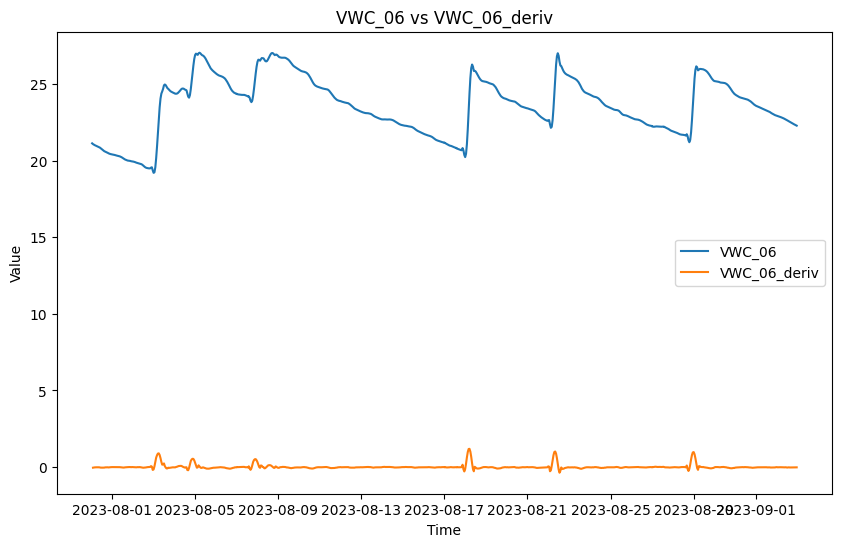

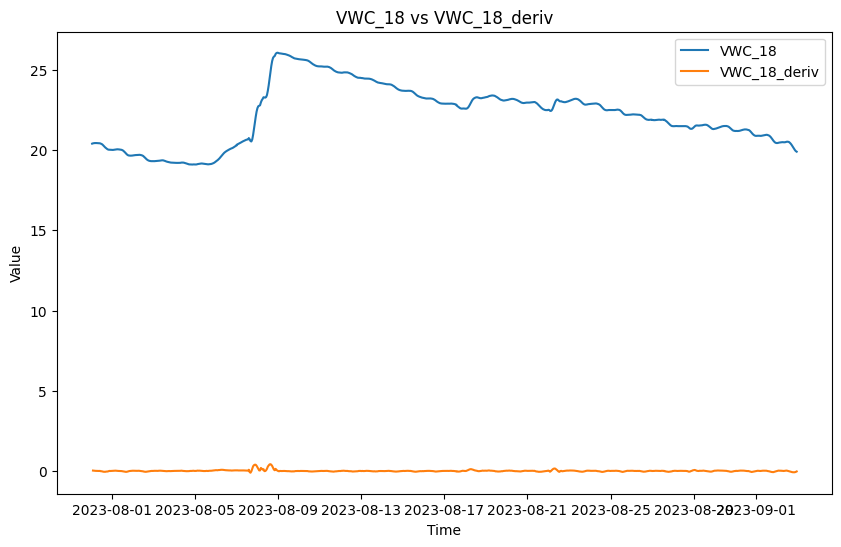

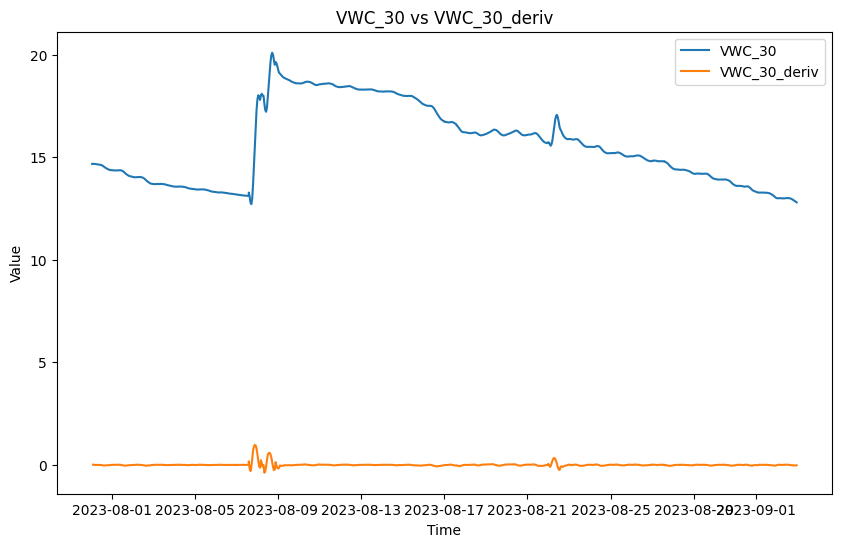

Shape of transformed DataFrame: (820, 31)


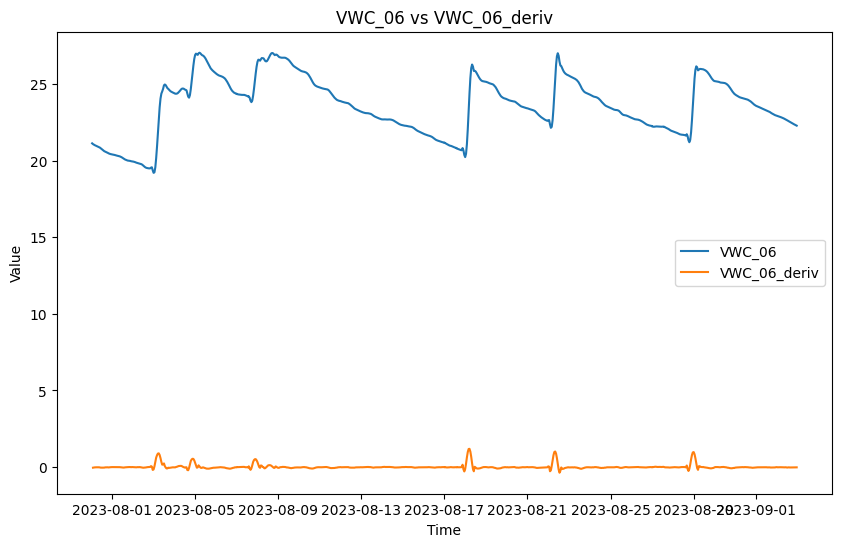

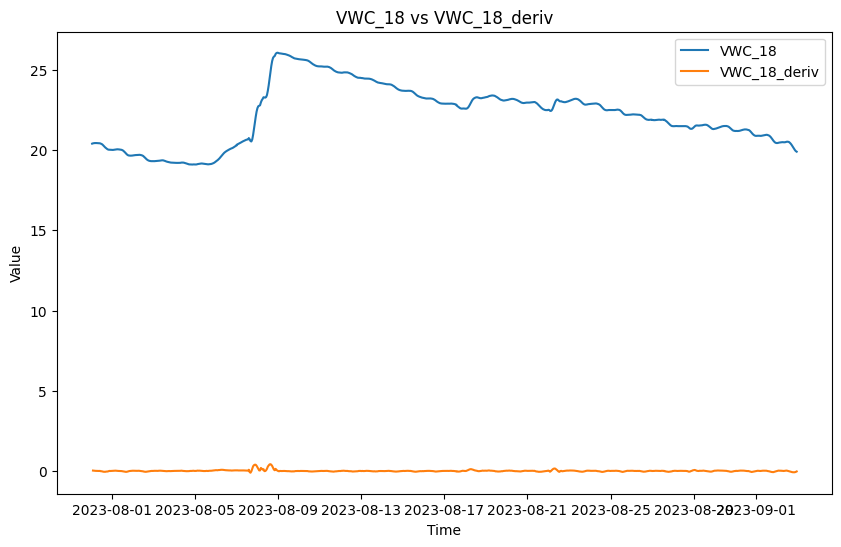

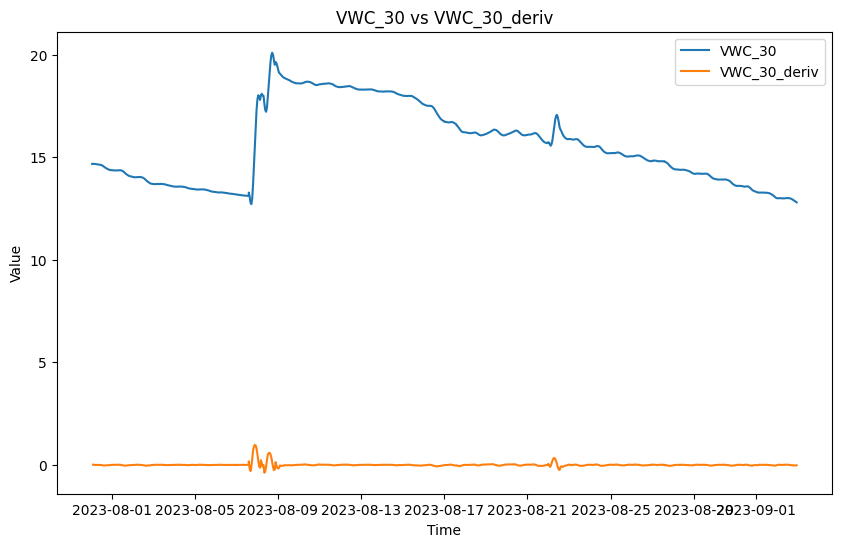

Shape of transformed DataFrame: (820, 31)


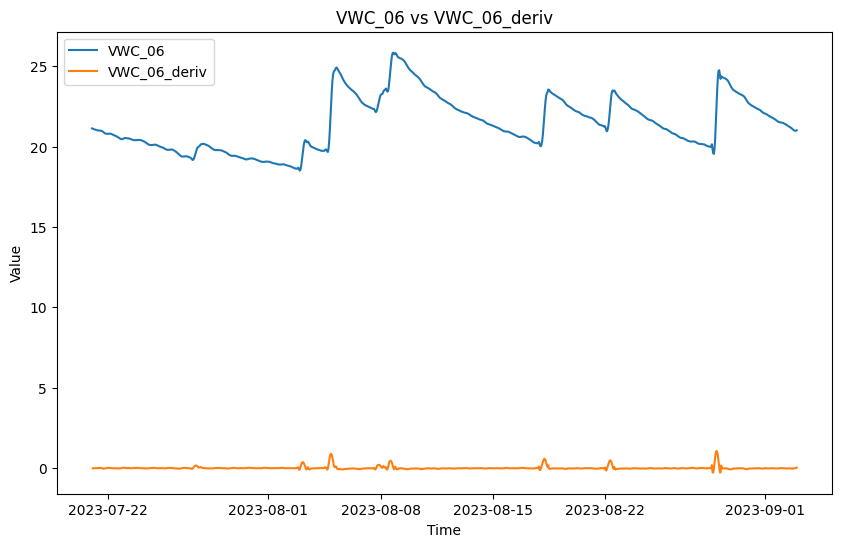

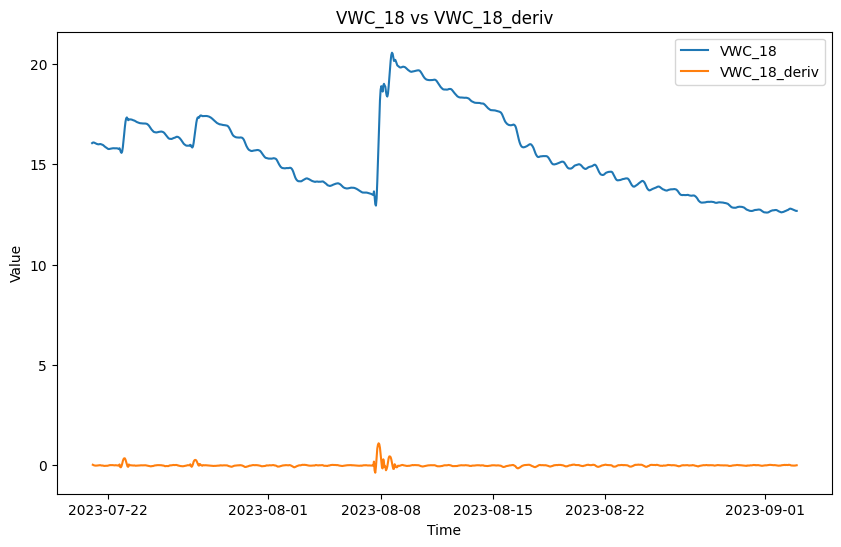

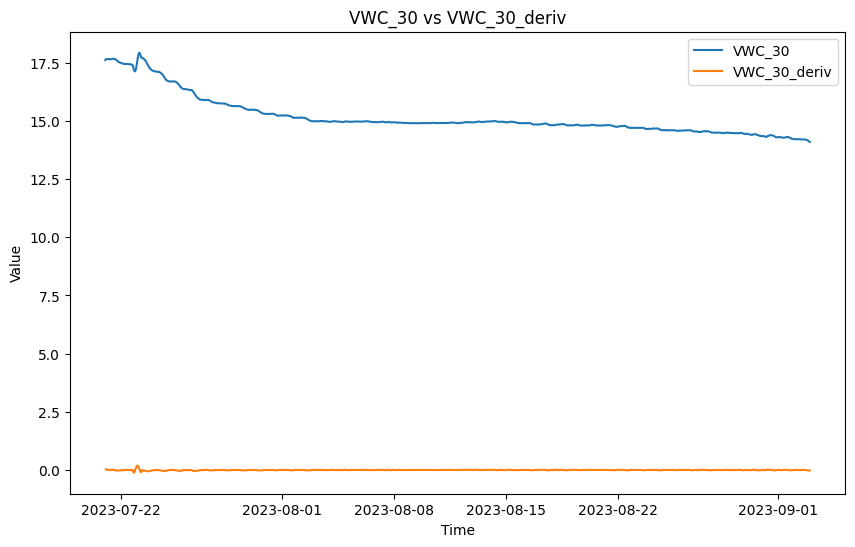

Shape of transformed DataFrame: (1055, 31)


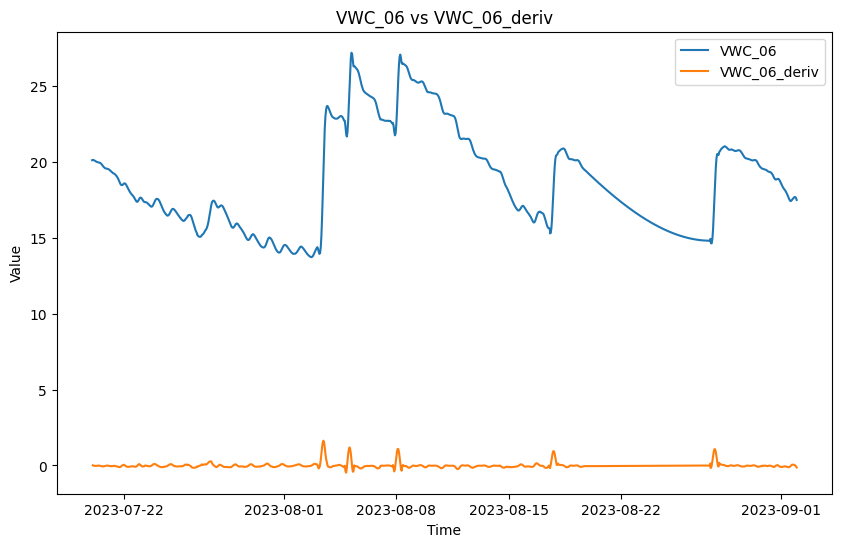

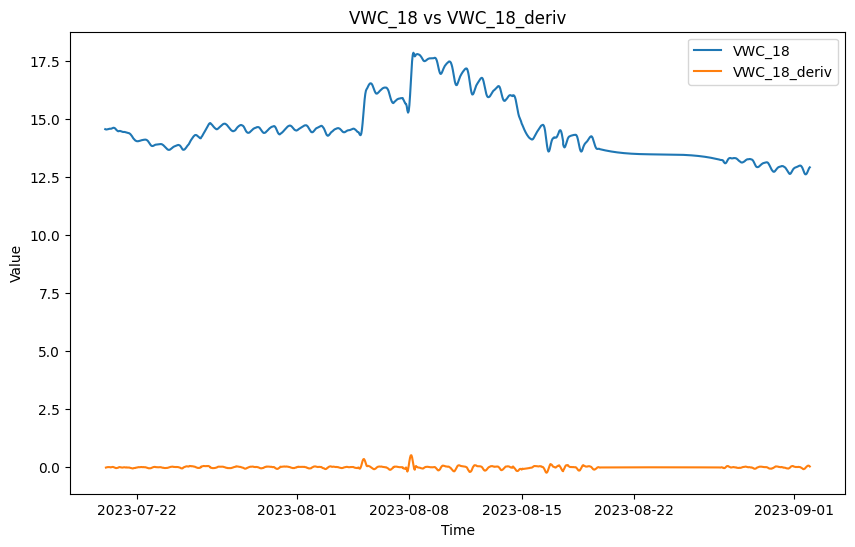

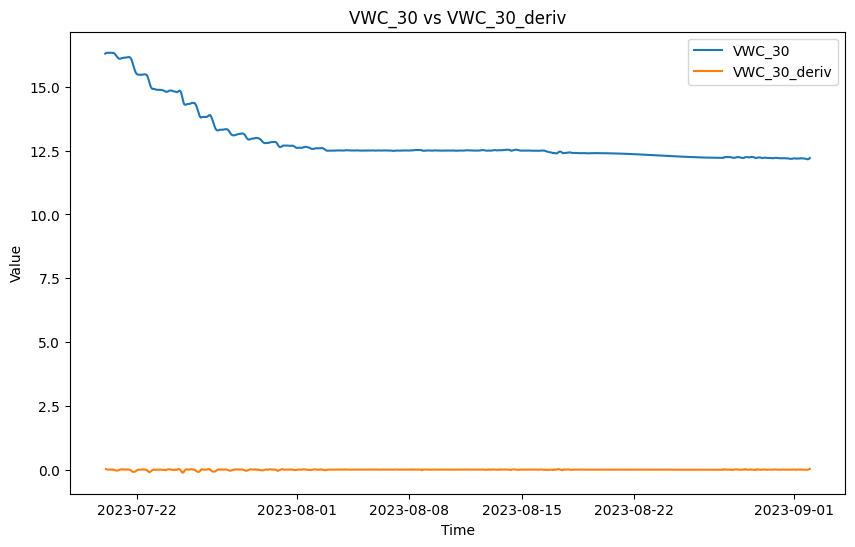

Shape of transformed DataFrame: (1062, 31)
Epoch 1/200
Validation loss for DataFrame_0: 0.115052729845047
Validation loss for DataFrame_1: 0.05102471262216568
Validation loss for DataFrame_2: 0.05158273130655289
Average validation loss for epoch 1: 0.07255338877439499
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 1 with validation loss: 0.07255338877439499
Epoch 2/200
Validation loss for DataFrame_0: 0.09837628155946732
Validation loss for DataFrame_1: 0.05135847255587578
Validation loss for DataFrame_2: 0.05988074094057083
Average validation loss for epoch 2: 0.06987183541059494
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 2 with validation loss: 0.06987183541059494
Epoch 3/200
Validation loss for DataFrame_0: 0.09024937450885773
Validation loss for DataFrame_1: 0.0458918958902359
Validation loss for DataFrame_2: 0.0650135725736618
Average validation loss for epoch 3: 0.06705161184072495
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 3 with validation loss: 0.06705161184072495
Epoch 4/200
Validation loss for DataFrame_0: 0.0855768695473671
Validation loss for DataFrame_1: 0.045019764453172684
Validation loss for DataFrame_2: 0.06895290315151215
Average validation loss for epoch 4: 0.06651651114225388
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 4 with validation loss: 0.06651651114225388
Epoch 5/200
Validation loss for DataFrame_0: 0.08217926323413849
Validation loss for DataFrame_1: 0.04582779482007027
Validation loss for DataFrame_2: 0.0719599798321724
Average validation loss for epoch 5: 0.06665567308664322
Epoch 6/200
Validation loss for DataFrame_0: 0.08088524639606476
Validation loss for DataFrame_1: 0.04669595882296562
Validation loss for DataFrame_2: 0.07275424897670746
Average validation loss for epoch 6: 0.06677848845720291
Epoch 7/200
Validation loss for DataFrame_0: 0.09115362167358398
Validation loss for DataFrame_1: 0.050617437809705734
Validation loss for DataFrame_2: 0.06537105143070221
Average validation loss for epoch 7: 0.06904736906290054
Epoch 8/200
Validation loss for DataFrame_0: 0.08091520518064499
Validation loss for DataFrame_1: 0.04795510694384575
Validation loss for DataFrame_2: 0.0731072872877121
Average validation loss for epoch 8: 0.06732586771249771
Epoch 9/200
Validation l

INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 13 with validation loss: 0.06616313010454178
Epoch 14/200
Validation loss for DataFrame_0: 0.07117225229740143
Validation loss for DataFrame_1: 0.06359211355447769
Validation loss for DataFrame_2: 0.061760298907756805
Average validation loss for epoch 14: 0.06550822407007217
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 14 with validation loss: 0.06550822407007217
Epoch 15/200
Validation loss for DataFrame_0: 0.05833354592323303
Validation loss for DataFrame_1: 0.05796683579683304
Validation loss for DataFrame_2: 0.054075855761766434
Average validation loss for epoch 15: 0.05679208040237427
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 15 with validation loss: 0.05679208040237427
Epoch 16/200
Validation loss for DataFrame_0: 0.04695494472980499
Validation loss for DataFrame_1: 0.045348335057497025
Validation loss for DataFrame_2: 0.03288740664720535
Average validation loss for epoch 16: 0.04173022508621216
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 16 with validation loss: 0.04173022508621216
Epoch 17/200
Validation loss for DataFrame_0: 0.05394155904650688
Validation loss for DataFrame_1: 0.03590726479887962
Validation loss for DataFrame_2: 0.02327539399266243
Average validation loss for epoch 17: 0.03770807385444641
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 17 with validation loss: 0.03770807385444641
Epoch 18/200
Validation loss for DataFrame_0: 0.036291543394327164
Validation loss for DataFrame_1: 0.03421175479888916
Validation loss for DataFrame_2: 0.020736243575811386
Average validation loss for epoch 18: 0.030413180589675903
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 18 with validation loss: 0.030413180589675903
Epoch 19/200
Validation loss for DataFrame_0: 0.030981391668319702
Validation loss for DataFrame_1: 0.03481859341263771
Validation loss for DataFrame_2: 0.024883093312382698
Average validation loss for epoch 19: 0.030227690935134888
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 19 with validation loss: 0.030227690935134888
Epoch 20/200
Validation loss for DataFrame_0: 0.026875264942646027
Validation loss for DataFrame_1: 0.02878895029425621
Validation loss for DataFrame_2: 0.020728887990117073
Average validation loss for epoch 20: 0.025464368984103203
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 20 with validation loss: 0.025464368984103203
Epoch 21/200
Validation loss for DataFrame_0: 0.029982183128595352
Validation loss for DataFrame_1: 0.028567742556333542
Validation loss for DataFrame_2: 0.019552132114768028
Average validation loss for epoch 21: 0.026034019887447357
Epoch 22/200
Validation loss for DataFrame_0: 0.07565102726221085
Validation loss for DataFrame_1: 0.027743404731154442
Validation loss for DataFrame_2: 0.019586661830544472
Average validation loss for epoch 22: 0.04099369794130325
Epoch 23/200
Validation loss for DataFrame_0: 0.018516317009925842
Validation loss for DataFrame_1: 0.0283272173255682
Validation loss for DataFrame_2: 0.018909769132733345
Average validation loss for epoch 23: 0.021917767822742462
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 23 with validation loss: 0.021917767822742462
Epoch 24/200
Validation loss for DataFrame_0: 0.0335313118994236
Validation loss for DataFrame_1: 0.02915349043905735
Validation loss for DataFrame_2: 0.01753566414117813
Average validation loss for epoch 24: 0.02674015611410141
Epoch 25/200
Validation loss for DataFrame_0: 0.02423081360757351
Validation loss for DataFrame_1: 0.027867520228028297
Validation loss for DataFrame_2: 0.016833554953336716
Average validation loss for epoch 25: 0.022977298125624657
Epoch 26/200
Validation loss for DataFrame_0: 0.053947050124406815
Validation loss for DataFrame_1: 0.025997454300522804
Validation loss for DataFrame_2: 0.01618204265832901
Average validation loss for epoch 26: 0.032042182981967926
Epoch 27/200
Validation loss for DataFrame_0: 0.027266450226306915
Validation loss for DataFrame_1: 0.02590838447213173
Validation loss for DataFrame_2: 0.016952011734247208
Average validation loss for epoch 27: 0.02337561547756195
Epoch 

INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 28 with validation loss: 0.01913144625723362
Epoch 29/200
Validation loss for DataFrame_0: 0.02255101315677166
Validation loss for DataFrame_1: 0.024123618379235268
Validation loss for DataFrame_2: 0.01511037815362215
Average validation loss for epoch 29: 0.0205950029194355
Epoch 30/200
Validation loss for DataFrame_0: 0.05353795737028122
Validation loss for DataFrame_1: 0.02392372488975525
Validation loss for DataFrame_2: 0.015060852281749249
Average validation loss for epoch 30: 0.03084084391593933
Epoch 31/200
Validation loss for DataFrame_0: 0.032720305025577545
Validation loss for DataFrame_1: 0.02342112734913826
Validation loss for DataFrame_2: 0.01587730087339878
Average validation loss for epoch 31: 0.024006245657801628
Epoch 32/200
Validation loss for DataFrame_0: 0.02272251807153225
Validation loss for DataFrame_1: 0.025555547326803207
Validation loss for DataFrame_2: 0.015057280659675598
Average validation loss for epoch 32: 0.021111780777573586
Epoch 33

INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 40 with validation loss: 0.01892629824578762
Epoch 41/200
Validation loss for DataFrame_0: 0.01791287772357464
Validation loss for DataFrame_1: 0.03089461289346218
Validation loss for DataFrame_2: 0.015392218716442585
Average validation loss for epoch 41: 0.021399902179837227
Epoch 42/200
Validation loss for DataFrame_0: 0.025989936664700508
Validation loss for DataFrame_1: 0.027230892330408096
Validation loss for DataFrame_2: 0.015492042526602745
Average validation loss for epoch 42: 0.02290429174900055
Epoch 43/200
Validation loss for DataFrame_0: 0.02044454962015152
Validation loss for DataFrame_1: 0.026151131838560104
Validation loss for DataFrame_2: 0.015204708091914654
Average validation loss for epoch 43: 0.020600130781531334
Epoch 44/200
Validation loss for DataFrame_0: 0.034296371042728424
Validation loss for DataFrame_1: 0.023665091022849083
Validation loss for DataFrame_2: 0.015449044294655323
Average validation loss for epoch 44: 0.024470170959830284
Ep

INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 45 with validation loss: 0.01699046976864338
Epoch 46/200
Validation loss for DataFrame_0: 0.018004335463047028
Validation loss for DataFrame_1: 0.022927608340978622
Validation loss for DataFrame_2: 0.015662390738725662
Average validation loss for epoch 46: 0.01886477880179882
Epoch 47/200
Validation loss for DataFrame_0: 0.020004969090223312
Validation loss for DataFrame_1: 0.025560537353157997
Validation loss for DataFrame_2: 0.015568365342915058
Average validation loss for epoch 47: 0.020377958193421364
Epoch 48/200
Validation loss for DataFrame_0: 0.02089069038629532
Validation loss for DataFrame_1: 0.02579900622367859
Validation loss for DataFrame_2: 0.015726665034890175
Average validation loss for epoch 48: 0.02080545388162136
Epoch 49/200
Validation loss for DataFrame_0: 0.015381289646029472
Validation loss for DataFrame_1: 0.02628817781805992
Validation loss for DataFrame_2: 0.01573539711534977
Average validation loss for epoch 49: 0.01913495361804962
Epoch

INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 95 with validation loss: 0.014938713051378727
Epoch 96/200
Validation loss for DataFrame_0: 0.024440757930278778
Validation loss for DataFrame_1: 0.01905902847647667
Validation loss for DataFrame_2: 0.014627677388489246
Average validation loss for epoch 96: 0.019375821575522423
Epoch 97/200
Validation loss for DataFrame_0: 0.017723912373185158
Validation loss for DataFrame_1: 0.023159343749284744
Validation loss for DataFrame_2: 0.014294564723968506
Average validation loss for epoch 97: 0.01839260756969452
Epoch 98/200
Validation loss for DataFrame_0: 0.022559570148587227
Validation loss for DataFrame_1: 0.013407081365585327
Validation loss for DataFrame_2: 0.014310735277831554
Average validation loss for epoch 98: 0.016759129241108894
Epoch 99/200
Validation loss for DataFrame_0: 0.012551523745059967
Validation loss for DataFrame_1: 0.01458148192614317
Validation loss for DataFrame_2: 0.014535481110215187
Average validation loss for epoch 99: 0.013889496214687824


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 99 with validation loss: 0.013889496214687824
Epoch 100/200
Validation loss for DataFrame_0: 0.020184636116027832
Validation loss for DataFrame_1: 0.024225028231739998
Validation loss for DataFrame_2: 0.014559607021510601
Average validation loss for epoch 100: 0.01965642347931862
Epoch 101/200
Validation loss for DataFrame_0: 0.01534732524305582
Validation loss for DataFrame_1: 0.017940660938620567
Validation loss for DataFrame_2: 0.014865381643176079
Average validation loss for epoch 101: 0.016051122918725014
Epoch 102/200
Validation loss for DataFrame_0: 0.01579144410789013
Validation loss for DataFrame_1: 0.012003853917121887
Validation loss for DataFrame_2: 0.014809469692409039
Average validation loss for epoch 102: 0.014201588928699493
Epoch 103/200
Validation loss for DataFrame_0: 0.014413567259907722
Validation loss for DataFrame_1: 0.011121654883027077
Validation loss for DataFrame_2: 0.014427324756979942
Average validation loss for epoch 103: 0.01332084834

INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 103 with validation loss: 0.01332084834575653
Epoch 104/200
Validation loss for DataFrame_0: 0.02043856307864189
Validation loss for DataFrame_1: 0.014657710678875446
Validation loss for DataFrame_2: 0.014809596352279186
Average validation loss for epoch 104: 0.016635289415717125
Epoch 105/200
Validation loss for DataFrame_0: 0.014201472513377666
Validation loss for DataFrame_1: 0.030073869973421097
Validation loss for DataFrame_2: 0.015291990712285042
Average validation loss for epoch 105: 0.01985577680170536
Epoch 106/200
Validation loss for DataFrame_0: 0.013108959421515465
Validation loss for DataFrame_1: 0.0124409394338727
Validation loss for DataFrame_2: 0.01414327323436737
Average validation loss for epoch 106: 0.013231057673692703
INFO:tensorflow:Assets written to: ./LSTM_data\assets


INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 106 with validation loss: 0.013231057673692703
Epoch 107/200
Validation loss for DataFrame_0: 0.03624698519706726
Validation loss for DataFrame_1: 0.010924659669399261
Validation loss for DataFrame_2: 0.014663880690932274
Average validation loss for epoch 107: 0.020611843094229698
Epoch 108/200
Validation loss for DataFrame_0: 0.012566173449158669
Validation loss for DataFrame_1: 0.02600235305726528
Validation loss for DataFrame_2: 0.015422540716826916
Average validation loss for epoch 108: 0.017997022718191147
Epoch 109/200
Validation loss for DataFrame_0: 0.021860472857952118
Validation loss for DataFrame_1: 0.022252026945352554
Validation loss for DataFrame_2: 0.013793377205729485
Average validation loss for epoch 109: 0.01930195838212967
Epoch 110/200
Validation loss for DataFrame_0: 0.01235360186547041
Validation loss for DataFrame_1: 0.02449815906584263
Validation loss for DataFrame_2: 0.014631519094109535
Average validation loss for epoch 110: 0.017161093652

INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 127 with validation loss: 0.01310997735708952
Epoch 128/200
Validation loss for DataFrame_0: 0.020213309675455093
Validation loss for DataFrame_1: 0.015746567398309708
Validation loss for DataFrame_2: 0.017721781507134438
Average validation loss for epoch 128: 0.01789388619363308
Epoch 129/200
Validation loss for DataFrame_0: 0.012152294628322124
Validation loss for DataFrame_1: 0.01546783559024334
Validation loss for DataFrame_2: 0.01526019535958767
Average validation loss for epoch 129: 0.014293442480266094
Epoch 130/200
Validation loss for DataFrame_0: 0.02693837136030197
Validation loss for DataFrame_1: 0.013001891784369946
Validation loss for DataFrame_2: 0.014036446809768677
Average validation loss for epoch 130: 0.017992237582802773
Epoch 131/200
Validation loss for DataFrame_0: 0.010181473568081856
Validation loss for DataFrame_1: 0.010454780422151089
Validation loss for DataFrame_2: 0.018121439963579178
Average validation loss for epoch 131: 0.012919231317

INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 131 with validation loss: 0.012919231317937374
Epoch 132/200
Validation loss for DataFrame_0: 0.015092946588993073
Validation loss for DataFrame_1: 0.021390128880739212
Validation loss for DataFrame_2: 0.01529536210000515
Average validation loss for epoch 132: 0.01725947856903076
Epoch 133/200
Validation loss for DataFrame_0: 0.017077842727303505
Validation loss for DataFrame_1: 0.016072187572717667
Validation loss for DataFrame_2: 0.014582416042685509
Average validation loss for epoch 133: 0.015910817310214043
Epoch 134/200
Validation loss for DataFrame_0: 0.021691907197237015
Validation loss for DataFrame_1: 0.026133203878998756
Validation loss for DataFrame_2: 0.015579992905259132
Average validation loss for epoch 134: 0.021135034039616585
Epoch 135/200
Validation loss for DataFrame_0: 0.01932799071073532
Validation loss for DataFrame_1: 0.02797709032893181
Validation loss for DataFrame_2: 0.01483860146254301
Average validation loss for epoch 135: 0.020714560523

INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 167 with validation loss: 0.012708857655525208
Epoch 168/200
Validation loss for DataFrame_0: 0.016987178474664688
Validation loss for DataFrame_1: 0.011040163226425648
Validation loss for DataFrame_2: 0.014375093393027782
Average validation loss for epoch 168: 0.014134145341813564
Epoch 169/200
Validation loss for DataFrame_0: 0.020421501249074936
Validation loss for DataFrame_1: 0.008957820013165474
Validation loss for DataFrame_2: 0.014393438585102558
Average validation loss for epoch 169: 0.014590919949114323
Epoch 170/200
Validation loss for DataFrame_0: 0.01583101600408554
Validation loss for DataFrame_1: 0.01451690774410963
Validation loss for DataFrame_2: 0.014761711470782757
Average validation loss for epoch 170: 0.015036545693874359
Epoch 171/200
Validation loss for DataFrame_0: 0.014273037202656269
Validation loss for DataFrame_1: 0.01412404514849186
Validation loss for DataFrame_2: 0.014380005188286304
Average validation loss for epoch 171: 0.0142590291

INFO:tensorflow:Assets written to: ./LSTM_data\assets


Model saved at epoch 172 with validation loss: 0.011825606226921082
Epoch 173/200
Validation loss for DataFrame_0: 0.02286839298903942
Validation loss for DataFrame_1: 0.006869655102491379
Validation loss for DataFrame_2: 0.012525355443358421
Average validation loss for epoch 173: 0.014087800867855549
Epoch 174/200
Validation loss for DataFrame_0: 0.04774301499128342
Validation loss for DataFrame_1: 0.03274261951446533
Validation loss for DataFrame_2: 0.013592454604804516
Average validation loss for epoch 174: 0.031359363347291946
Epoch 175/200
Validation loss for DataFrame_0: 0.10320112854242325
Validation loss for DataFrame_1: 0.03210168331861496
Validation loss for DataFrame_2: 0.012963426299393177
Average validation loss for epoch 175: 0.04942208155989647
Epoch 176/200
Validation loss for DataFrame_0: 0.0655994713306427
Validation loss for DataFrame_1: 0.04801139980554581
Validation loss for DataFrame_2: 0.012750990688800812
Average validation loss for epoch 176: 0.0421206206083297

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2 
import matplotlib.pyplot as plt



def subtract_mean(df, target_columns, keep_original_cols=True):
    mean_values = {}
    for col in target_columns:
        mean_value = df[col].mean()
        # When keep_original_cols is True, subtract the mean from a new column
        if keep_original_cols:
            new_col_name = f"{col}_mean_subtracted"
            df[new_col_name] = df[col] - mean_value
        else:
            df[col] -= mean_value
        mean_values[col] = mean_value
    return df, mean_values



def create_derivative_columns(df, target_columns, keep_original_cols=True):
    """Calculates difference-based derivatives of specified columns.

    Args:
        df: Pandas DataFrame containing the data.
        target_columns: List of columns for which derivatives are calculated.
        keep_original_cols: If True, creates new columns; otherwise overwrites.

    Returns:
        DataFrame with derivative columns, plus initial values if needed.
    """

    initial_values = {}  # Store initial values for reconstruction

    for col in target_columns:
        deriv_col_name = f"{col}_deriv"

        if keep_original_cols:
            df[deriv_col_name] = df[col].diff()  # Calculate differences
            
             #Plot the original and derived columns
            plt.figure(figsize=(10, 6))
            plt.plot(df[col], label=col)
            plt.plot(df[deriv_col_name], label=deriv_col_name)
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.title(f'{col} vs {deriv_col_name}')
            plt.legend()
            plt.show()
            
        else:
            initial_values[col] = df[col].iloc[0]  # Store initial value
            df[col] = df[col].diff()  
            

    return df, initial_values  # Return initial values as well

def scale_dataframe(df, scalers):
    """
    Optimally scale all columns in a DataFrame using MinMaxScaler, adjusting for an expanded range with a buffer. 
    This involves creating a dummy range for scaler fitting, then scaling the original data with the adjusted scaler.

    Args:
        df (pd.DataFrame): DataFrame with columns to be scaled.
        scalers (dict): Dictionary storing the scalers for each column.

    Returns:
        pd.DataFrame: Scaled DataFrame using the optimally adjusted scalers.
        dict: Dictionary of the adjusted scalers.
    """
    scaled_df = pd.DataFrame()  # Initialize an empty DataFrame for scaled values
    for column in df.columns:
        # Check if a scaler already exists; if not, proceed to create and fit a new one
        if column not in scalers:
            # Calculate the original range and apply a 30% buffer
            col_min, col_max = df[column].min(), df[column].max()
            range_buffer = (col_max - col_min) * 0.3  # 30% buffer
            buffered_min = col_min - range_buffer
            buffered_max = col_max + range_buffer

            # Create a new scaler and fit it on the buffered range
            scaler = MinMaxScaler(feature_range=(0, 1))
            scaler.fit([[buffered_min], [buffered_max]])
            scalers[column] = scaler

        # Scale the original data with the adjusted scaler
        scaled_values = scalers[column].transform(df[[column]].values.reshape(-1, 1)).flatten()  # Flatten the array here
        scaled_df[column] = scaled_values


    return scaled_df, scalers


def transform_and_scale_data(df, target_columns, scalers, keep_original_cols=True):
    """
    Transforms and scales the data in the DataFrame for neural network input, returning the
    transformed DataFrame, updated scalers, and transformation metadata.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_columns (list): List of target column names.
        scalers (dict): Dictionary containing MinMaxScalers for each column, can be empty.
        keep_original_cols (bool): If True, keeps original columns unchanged except for scaling;
                                   if False, applies transformations directly on the target columns.

    Returns:
        pd.DataFrame: The transformed and scaled DataFrame.
        dict: Updated dictionary containing MinMaxScalers for each column.
        dict: A dictionary containing transformation metadata for the target columns.
    """

    # Copy DataFrame to avoid modifying the original
    df_transformed = df.copy()

    
    # Subtract mean from target columns
    df_transformed, mean_values = subtract_mean(df_transformed, target_columns, keep_original_cols)
    
    # Apply transformations directly using helper functions
    df_transformed, initial_values = create_derivative_columns(df_transformed, target_columns, keep_original_cols)
    
    # Deleting or adjusting rows as necessary (e.g., due to NaN values from differentiation)
    df_transformed = df_transformed.iloc[1:]
    
    # Scale all columns in df_transformed
    df_transformed, scalers = scale_dataframe(df_transformed, scalers)
    
    print(f"Shape of transformed DataFrame: {df_transformed.shape}")
    
    # Metadata for reverse transformation
    transformation_metadata = {
        'means': mean_values,
        'scalers': scalers,
        'keep_original_cols': keep_original_cols,
        'initial_values': initial_values
    }

    return df_transformed, transformation_metadata


def reverse_transform_and_scale_data(df, transformation_metadata, target_columns):
    """
    Reverses the transformations and scaling applied to the DataFrame.

    Args:
        df (pd.DataFrame): The transformed and scaled DataFrame.
        transformation_metadata (dict): A dictionary containing transformation metadata.
        target_columns (list): List of target columns to be reverse transformed and scaled.

    Returns:
        pd.DataFrame: The DataFrame with reversed transformations and scaling.
    """

    # Extract metadata
    scalers = transformation_metadata['scalers']
    mean_values = transformation_metadata['means']
    initial_values = transformation_metadata['initial_values']
    keep_original_cols = transformation_metadata['keep_original_cols']

    # Print dimensions of df
    print(f"Shape of input DataFrame: {df.shape}")


    # Apply undifferencing with cumsum() and initial values if original columns were not kept
    if not keep_original_cols:
        for column in target_columns:
            # Reverse subtract mean from target columns if they were mean-adjusted
            if column in mean_values:
                df[column] = df[column] + mean_values[column]
                print(f"Reversed mean for {column}: ", df[column].head())

            # Apply cumsum() to reverse the differencing using initial values
            if column in initial_values:
                df[column] = df[column].cumsum() + initial_values[column]
                print(f"Undifferenced {column}: ", df[column].head())
                
    # Reverse scale the target columns
    for column in target_columns:
        if column in scalers:
            # Reshape data for inverse_transform
            scaled_data = df[[column]].values
            # Apply inverse_transform
            df[column] = scalers[column].inverse_transform(scaled_data)

    return df




# Sequence Creation Function
def create_sequences(input_data, target_data, input_window, forecast_horizon, stride=1):
    X, y = [], []
    for start in range(len(input_data) - input_window - forecast_horizon + stride):
        end = start + input_window
        X.append(input_data[start:end])
        y.append(target_data[end:end + forecast_horizon])
    return np.array(X), np.array(y)

# Model Definition Function for 4 Target Variables
# def build_model(input_shape, num_targets):
#     model = Sequential([
#         LSTM(128, input_shape=input_shape, return_sequences=True), 
#         LSTM(64, return_sequences=False),  
#         Dense(96 * num_targets), 
#         Reshape((96, num_targets)) 
#     ])
#     model.compile(optimizer='adam', loss='mse')
#     return model

def build_model(input_shape, num_targets):
    model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True, kernel_regularizer=l2(0.01)), 
        Dropout(0.2),
        LSTM(64, return_sequences=True, kernel_regularizer=l1(0.01)),  
        Dropout(0.2),
        LSTM(36, return_sequences=False),
        Dense(96 * num_targets), 
        Reshape((96, num_targets)) 
    ])
    model.compile(optimizer='adam', loss='mse')
    return model




def chronological_split(X, y, test_size=0.2):
    # Calculate the index to split the data
    total_samples = len(X)
    split_index = int(total_samples * (1 - test_size))
    
    # Split the data chronologically
    X_train = X[:split_index]
    X_val = X[split_index:]
    y_train = y[:split_index]
    y_val = y[split_index:]
    
    return X_train, X_val, y_train, y_val


# Define the training step
@tf.function
def train_step(model, optimizer, loss_function, x_batch, y_batch):
    with tf.GradientTape() as tape:
        predictions = model(x_batch, training=True)
        loss = loss_function(y_batch, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Define the validation step
@tf.function
def val_step(model, loss_function, x_batch, y_batch):
    predictions = model(x_batch, training=False)
    loss = loss_function(y_batch, predictions)
    return loss

def run_workflow(training_data_transformed, target_variables, input_window, forecast_horizon, stride, epochs, batch_size):
    X_train_all, X_val_all, y_train_all, y_val_all = [], [], [], []
    dataframe_identifiers = []

    # Data preparation
    for i, transformed_data in enumerate(training_data_transformed()):
        df = transformed_data[0]
        X, y = create_sequences(df.values, df[target_variables].values, input_window, forecast_horizon, stride)
        X_train, X_val, y_train, y_val = chronological_split(X, y)

        X_train_all.append(X_train)
        X_val_all.append(X_val)
        y_train_all.append(y_train)
        y_val_all.append(y_val)
        dataframe_identifiers.append(f"DataFrame_{i}")

    model = build_model((input_window, X_train_all[0].shape[2]), len(target_variables))
    optimizer = tf.keras.optimizers.Adam()
    loss_function = tf.keras.losses.MeanSquaredError()

    best_val_loss = np.inf
    checkpoint_path = "./LSTM_data"
    patience = 100  # Early stopping patience
    wait = 0  # Counter for epochs waited without improvement

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        total_val_loss = 0

        # Training
        for idx, (X_train, y_train) in enumerate(zip(X_train_all, y_train_all)):
            dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
            for x_batch, y_batch in dataset:
                train_step(model, optimizer, loss_function, x_batch, y_batch)

        # Validation
        for idx, (X_val, y_val) in enumerate(zip(X_val_all, y_val_all)):
            dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
            val_losses = []
            for x_batch, y_batch in dataset:
                val_loss = val_step(model, loss_function, x_batch, y_batch)
                val_losses.append(val_loss)
            avg_val_loss = tf.reduce_mean(val_losses)
            total_val_loss += avg_val_loss
            print(f"Validation loss for {dataframe_identifiers[idx]}: {avg_val_loss.numpy()}")

        average_val_loss = total_val_loss / len(X_val_all)
        print(f"Average validation loss for epoch {epoch+1}: {average_val_loss.numpy()}")

        # Early stopping and model saving logic
        if average_val_loss < best_val_loss:
            best_val_loss = average_val_loss
            model.save(checkpoint_path)
            print(f"Model saved at epoch {epoch+1} with validation loss: {average_val_loss.numpy()}")
            wait = 0  # Reset wait counter after improvement
        else:
            wait += 1
            if wait >= patience:
                print(f"Stopping early due to no improvement in validation loss for {patience} epochs.")
                break

    return checkpoint_path




# Example Usage
plot_numbers = [2014, 2015, 2007]


# Initialize a scaler
scalers = {}

# *** Important: Update the target_columns and continuous_columns based on your chosen target columns ***
# *** Any columns included in target_columns should be removed from continuous_columns ***
target_columns = ['VWC_06', 'VWC_18', 'VWC_30']
time_columns = ['day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos']
continuous_columns = [
    'Ta_2m_Avg', 'RH_2m_Avg', 'Solar_2m_Avg', 'WndAveSpd_3m', 'Rain_1m_Tot', 'Dp_2m_Avg',
    'TaMax_2m', 'TaMin_2m', 'RHMax_2m', 'RHMin_2m', 'HeatIndex_2m_Avg',
    'daily_et', 'CWSI', 'SWSI', 'irrigation', 'precip_irrig','canopy_temp'
]
derivative_columns = ['precip_irrig']

input_window = 168
forecast_horizon = 96
stride = 1
epochs = 100
batch_size = 32  # Adjust based on your dataset size and memory capacity

# Set to True to keep original columns unchanged
keep_original_cols=True


# Lambda function to handle training data and plot numbers
training_data_dfs = lambda: [process_data_for_plot(plot) for plot in plot_numbers]


# run once to get the transformation metadata
_, transformation_metadata = transform_and_scale_data(training_data_dfs()[0], target_columns, scalers, keep_original_cols)

# re-run with the transformation metadata for all training dataframes
training_data_transformed = lambda: [transform_and_scale_data(df, target_columns, transformation_metadata['scalers'], keep_original_cols) for df in training_data_dfs()]

# run the workflow for training the model
checkpoint_path = run_workflow(training_data_transformed, target_columns, 
                                      input_window, forecast_horizon, stride, epochs, batch_size)


    


Processing plot number 2001


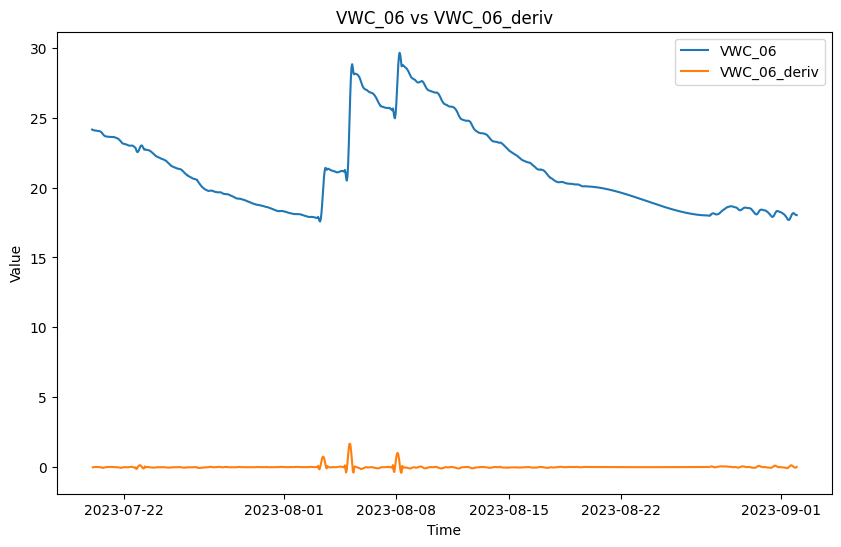

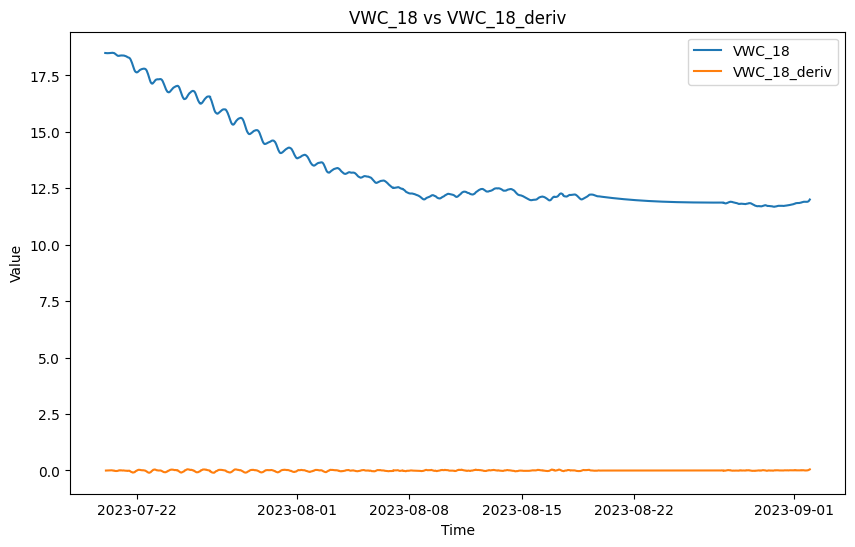

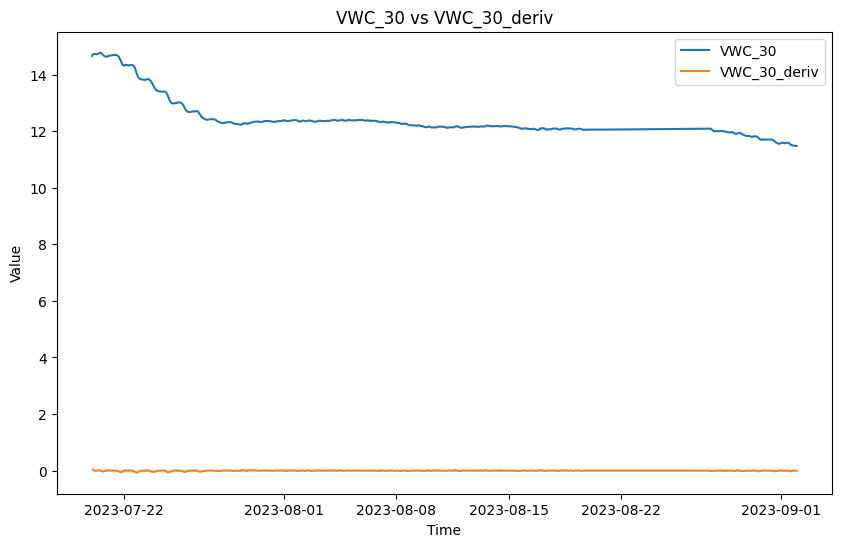

Shape of transformed DataFrame: (1062, 31)
Mean of the transformed DataFrame: Ta_2m_Avg                 0.510001
RH_2m_Avg                 0.562991
Solar_2m_Avg              0.367834
WndAveSpd_3m              0.375393
Dp_2m_Avg                 0.535599
TaMax_2m                  0.510263
TaMin_2m                  0.509232
RHMax_2m                  0.566008
RHMin_2m                  0.560289
HeatIndex_2m_Avg          0.530879
canopy_temp               0.543908
VWC_06                    0.353004
VWC_18                   -0.326253
VWC_30                    0.160527
daily_et                  0.375116
CWSI                      0.374135
SWSI                      1.857257
precip_irrig              0.191349
day_sin                   0.598562
day_cos                   0.376165
hour_sin                  0.499335
hour_cos                  0.499579
dow_sin                   0.500117
dow_cos                   0.471199
precip_irrig_log          0.194517
VWC_06_mean_subtracted    0.535404
VWC_18_mean_

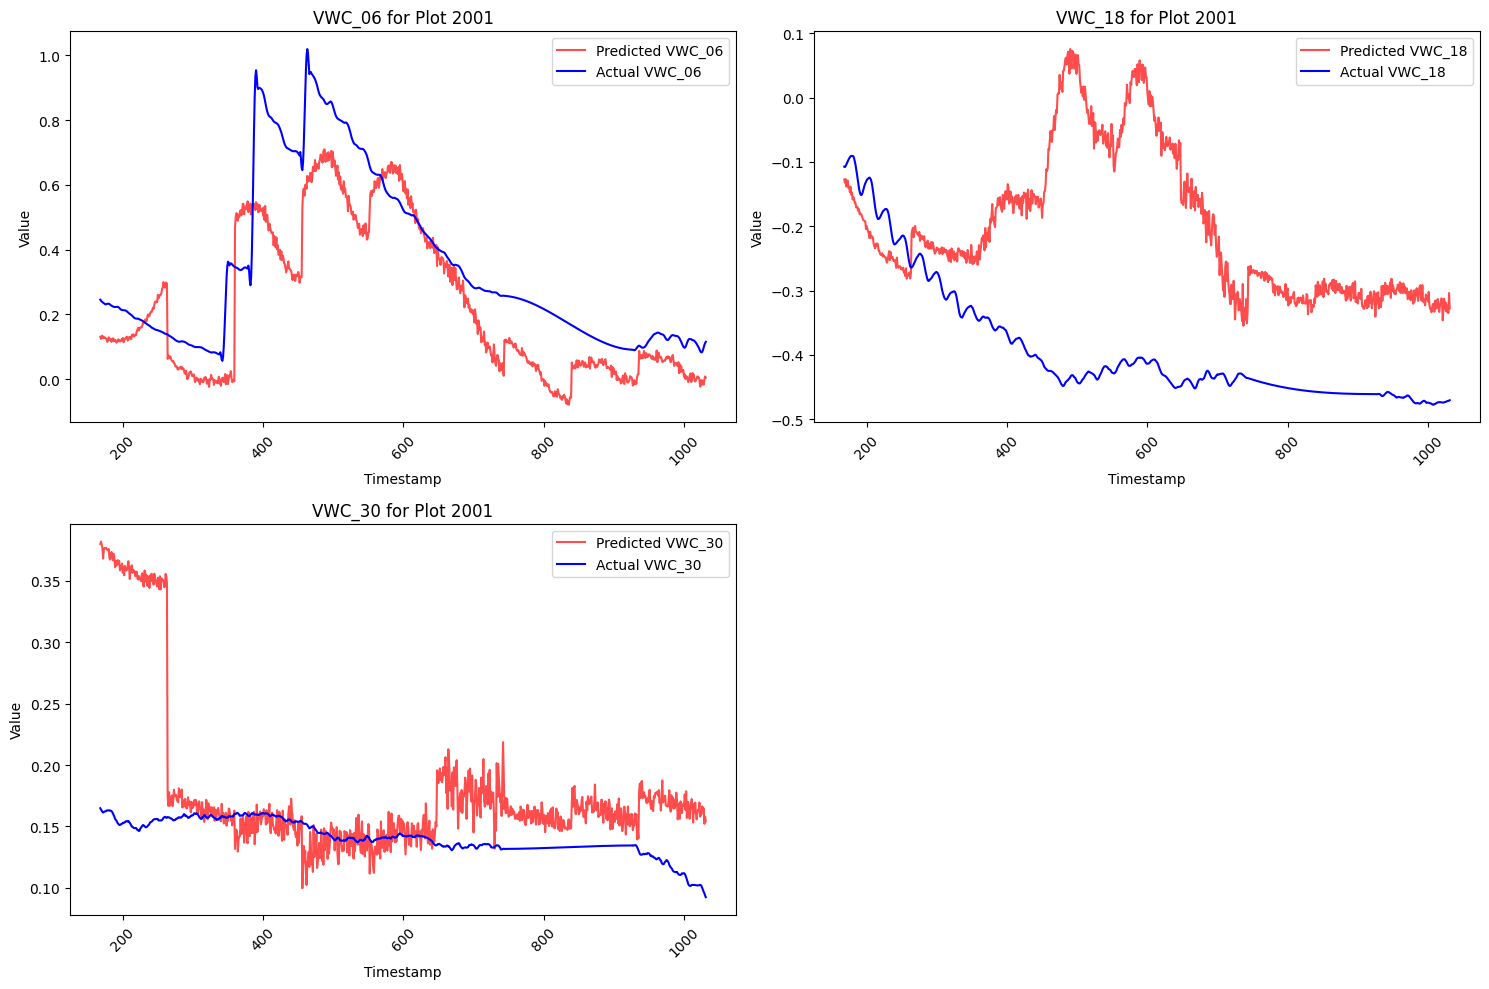

Shape of input DataFrame: (864, 3)
Shape of input DataFrame: (864, 3)
Values of predictions_df  and actuals_df after reverse transformation and scaling
        VWC_06     VWC_18     VWC_30
168  18.508989  15.587379  14.983131
169  18.424829  15.533638  15.005700
170  18.511610  15.595245  14.974509
        VWC_06     VWC_18     VWC_30
168  19.945417  15.811806  12.441396
169  19.903779  15.804647  12.428522
170  19.872932  15.823291  12.416948
Plotting predictions and actuals after reverse transformation and scaling


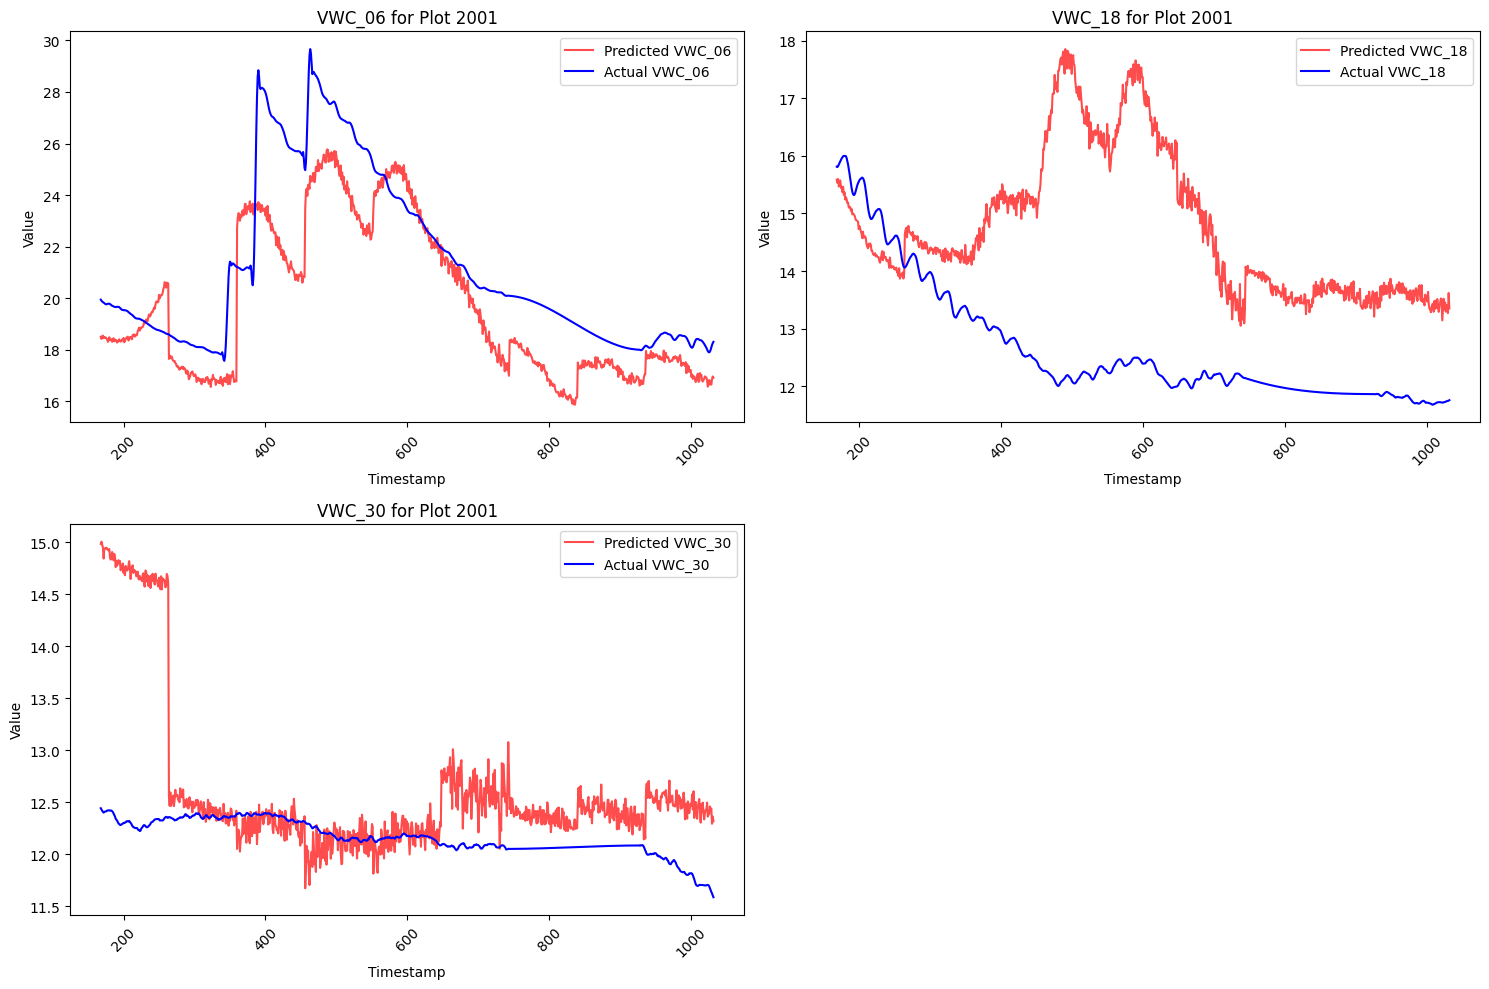

Processing plot number 2013


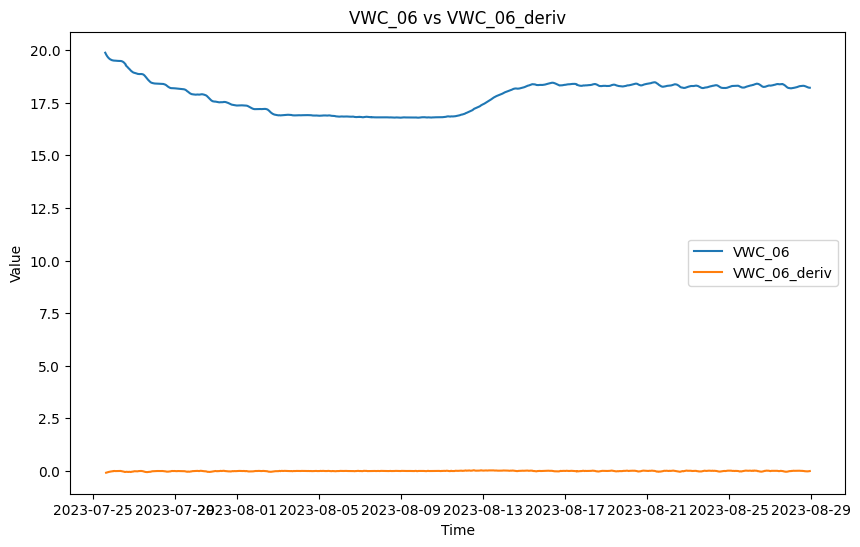

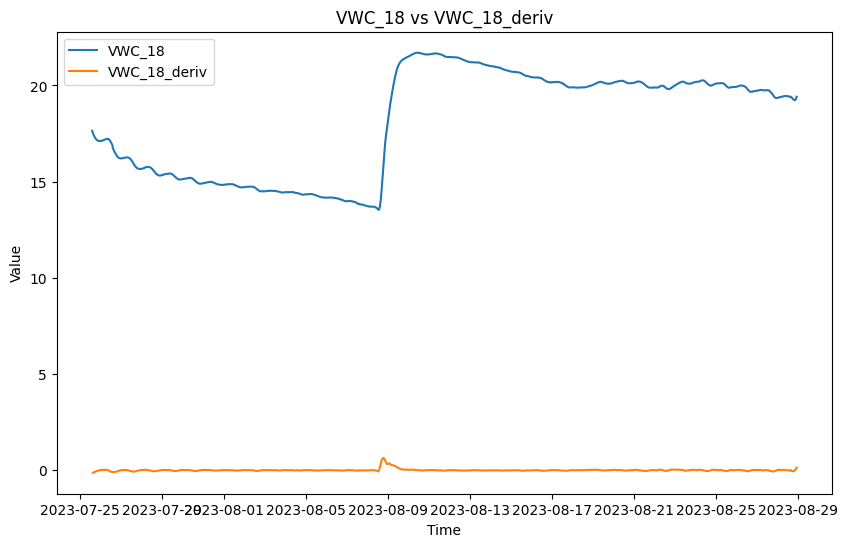

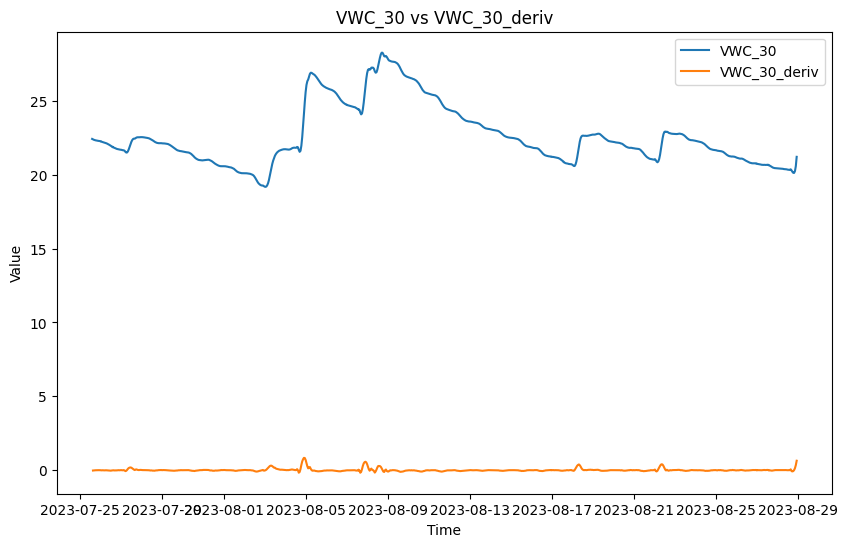

Shape of transformed DataFrame: (833, 31)
Mean of the transformed DataFrame: Ta_2m_Avg                 0.514028
RH_2m_Avg                 0.561025
Solar_2m_Avg              0.368935
WndAveSpd_3m              0.373158
Dp_2m_Avg                 0.540345
TaMax_2m                  0.514284
TaMin_2m                  0.513267
RHMax_2m                  0.563949
RHMin_2m                  0.558389
HeatIndex_2m_Avg          0.535314
canopy_temp               0.514868
VWC_06                    0.076221
VWC_18                    0.098800
VWC_30                    1.025248
daily_et                  0.370864
CWSI                      0.483845
SWSI                      0.503080
precip_irrig              0.191979
day_sin                   0.573683
day_cos                   0.378254
hour_sin                  0.496685
hour_cos                  0.500888
dow_sin                   0.495970
dow_cos                   0.480424
precip_irrig_log          0.195014
VWC_06_mean_subtracted    0.535423
VWC_18_mean_s

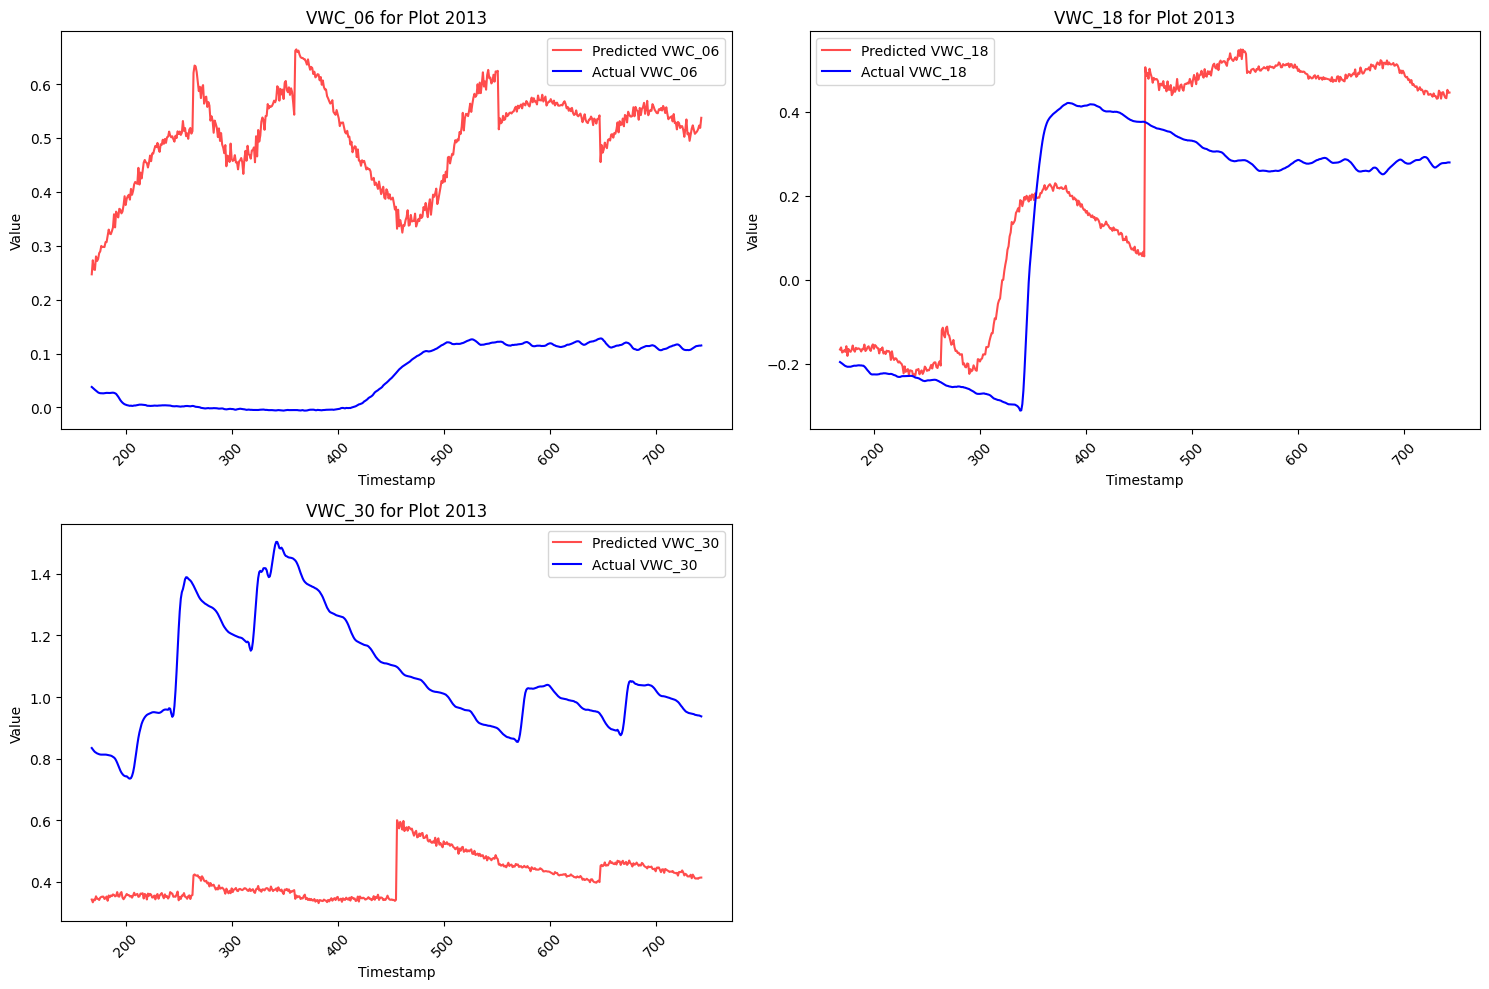

Shape of input DataFrame: (576, 3)
Shape of input DataFrame: (576, 3)
Values of predictions_df  and actuals_df after reverse transformation and scaling
        VWC_06     VWC_18     VWC_30
168  19.963818  15.160016  14.542434
169  20.291182  15.215842  14.436417
170  20.079254  15.081333  14.539783
        VWC_06     VWC_18     VWC_30
168  17.338356  14.828131  20.356286
169  17.315420  14.808250  20.299696
170  17.293246  14.787813  20.248056
Plotting predictions and actuals after reverse transformation and scaling


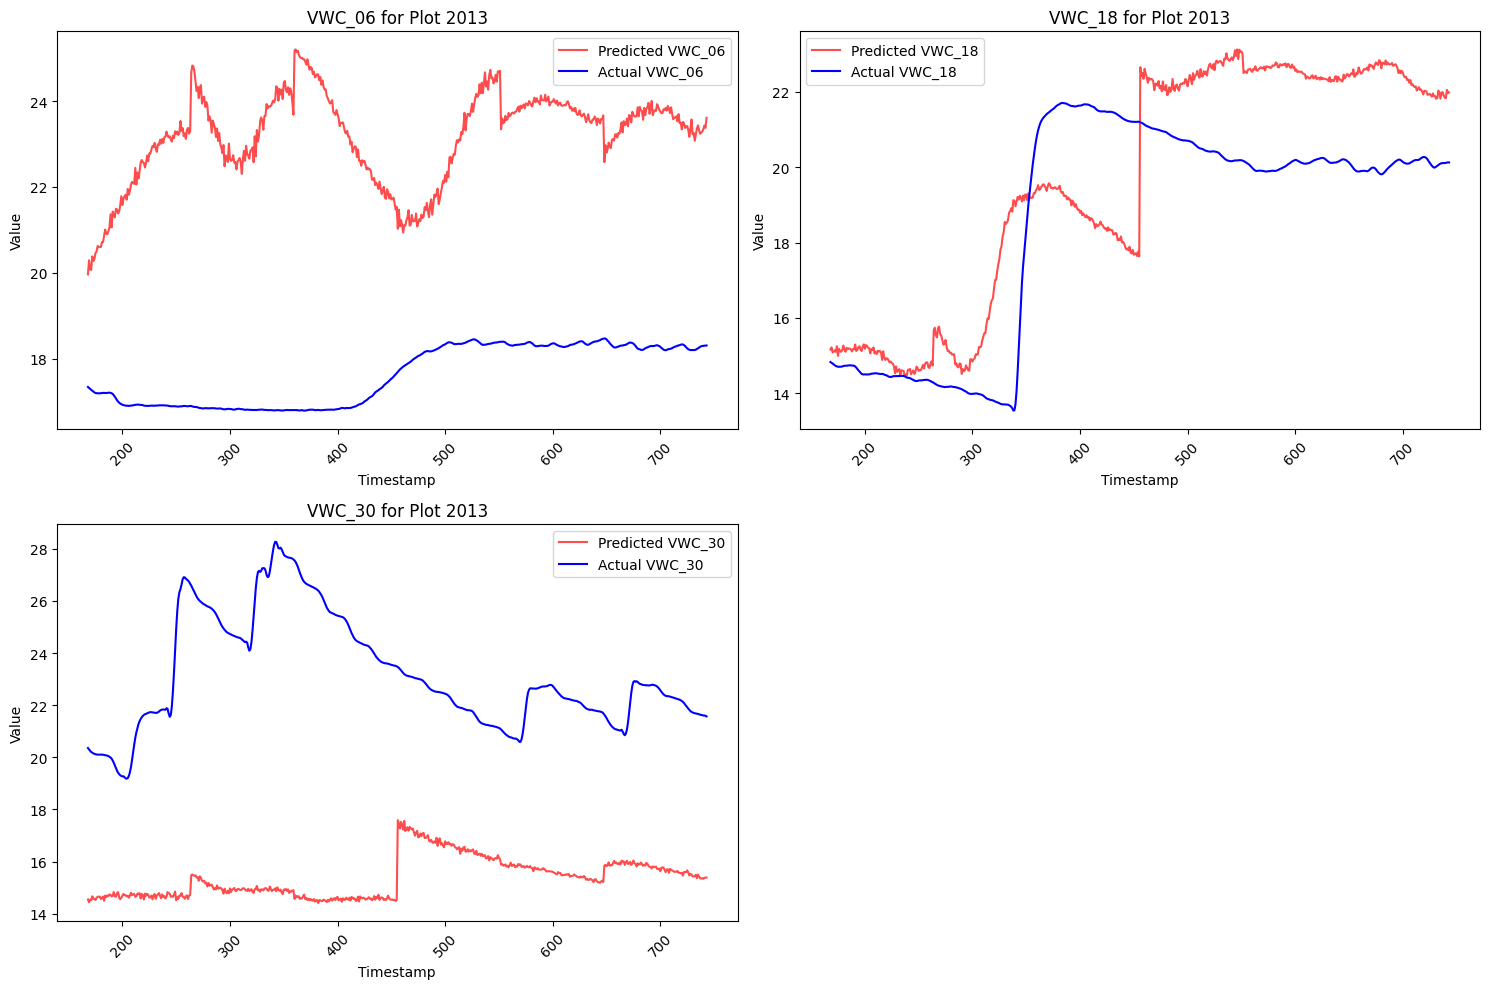

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

def plot_predictions(predictions_df, actuals_df, target_columns, plot_number):
    num_plots = len(target_columns)
    num_rows = int(np.ceil(num_plots / 2))  # You can adjust the number of columns per row if you like
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size as needed
    for i, column in enumerate(target_columns):
        plt.subplot(num_rows, 2, i + 1)  # Adjust the number of columns per row if you like
        plt.plot(predictions_df.index, predictions_df[column], label=f'Predicted {column}', color='red', alpha=0.7)
        plt.plot(actuals_df.index, actuals_df[column], label=f'Actual {column}', color='blue')
        plt.legend()
        plt.title(f'{column} for Plot {plot_number}')
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def predict_with_sliding_window(model, df, current_transformation_metadata, target_columns, input_window, forecast_horizon, plot_number):
    # Create input& target data, input data is all columns except target columns
    target_data = df[target_columns].values
    input_data = df.values
    predictions = []
    actuals = []
    timestamps = []
    
    # first iteration flag
    first_iter = True

    # Adjust stride based on prediction: 1 for continuous sliding
    stride = forecast_horizon
    for start in range(0, len(df) - input_window - forecast_horizon + 1, stride):
        end = start + input_window
        if end + forecast_horizon > len(input_data):
            break
        sequence = input_data[start:end]
        sequence = sequence.reshape((1, input_window, len(input_data[0])))

        

        pred = model.predict(sequence)

        
        if first_iter:
            print(f"Sequence shape: {sequence.shape}")
            # To print the top 3 lines, slice the second dimension (sequence length)
            print("Sequence (top 3 lines):")
            print(sequence[0, :3, :])  # Access the first element of the first dimension, then slice
            print(f"Predicted shape: {pred.shape}")
            # Similarly, for the predictions, slice the second dimension
            print("Predicted (top 3 lines):")
            print(pred[0, :3, :])  # Access the first element of the first dimension, then slice
        
            first_iter = False


        pred = pred.reshape(-1, pred.shape[-1])
        predictions.append(pred)
        actuals.append(target_data[end:end + forecast_horizon])
        timestamp_series = pd.Series(df.index[end:end + forecast_horizon], index=df.index[end:end + forecast_horizon])
        timestamps.append(timestamp_series)

    predictions = np.concatenate(predictions)
    actuals = np.concatenate(actuals)
    timestamps = pd.concat(timestamps)

    # Create the DataFrame with the reshaped predictions and the correct timestamps
    predictions_df = pd.DataFrame(predictions, columns=target_columns, index=timestamps)
    actuals_df = pd.DataFrame(actuals, columns=target_columns, index=timestamps)

    # Apply reverse transformation and scaling to both predictions and actuals

    # Plot the predictions and actuals before reverse transformation and scaling
    print("Plotting predictions and actuals before reverse transformation and scaling")
    print("Values of predictions_df  and actuals_df before reverse transformation and scaling")
    print(predictions_df.head(3))
    print(actuals_df.head(3))

    plot_predictions(predictions_df, actuals_df, target_columns, plot_number)

    # Apply reverse transformation and scaling to both predictions and actuals
    predictions_df = reverse_transform_and_scale_data(predictions_df, current_transformation_metadata, target_columns)
    actuals_df = reverse_transform_and_scale_data(actuals_df, current_transformation_metadata, target_columns)

    # Example usage
    print("Values of predictions_df  and actuals_df after reverse transformation and scaling")
    print(predictions_df.head(3))
    print(actuals_df.head(3))
    print("Plotting predictions and actuals after reverse transformation and scaling")
    plot_predictions(predictions_df, actuals_df, target_columns, plot_number)

    return predictions_df, actuals_df, timestamps

# Array of plot numbers
plot_numbers = [2001, 2013]

# initialize predictions_df and actuals_df and timestamps as empty dataframes
predictions_df = pd.DataFrame()
actuals_df = pd.DataFrame()
timestamps = pd.Series()

# initialize scalers from transformation_metadata
scalers = transformation_metadata['scalers']
keep_original_cols = transformation_metadata['keep_original_cols'] 

# Loop through plot numbers
for plot_number in plot_numbers:
    print(f"Processing plot number {plot_number}")
    
    model = tf.keras.models.load_model(checkpoint_path)
    

    df_plot = process_data_for_plot(plot_number)
    
    #drop VWC_40 column if it exists
    if 'VWC_42' in df_plot.columns:
        df_plot = df_plot.drop(columns=['VWC_42'])

    df_plot, current_transform_metadata = transform_and_scale_data(df_plot, target_columns, scalers, keep_original_cols)
    
    # print the mean of the transformed dataframe
    print(f"Mean of the transformed DataFrame: {df_plot.mean()}")

    
    predictions_df, actuals_df, timestamps = predict_with_sliding_window(model, df_plot, current_transformation_metadata=current_transform_metadata, 
                                                                         target_columns=target_columns, input_window=24*7, forecast_horizon=96, plot_number=plot_number)


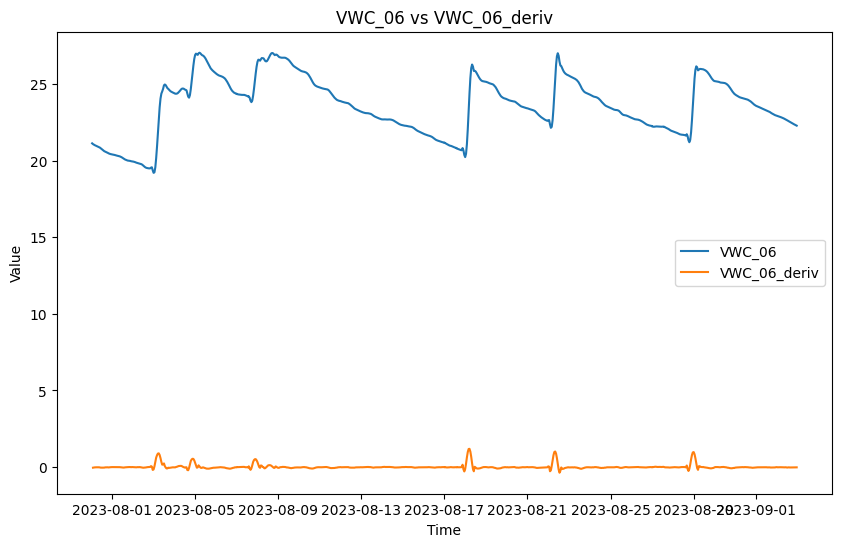

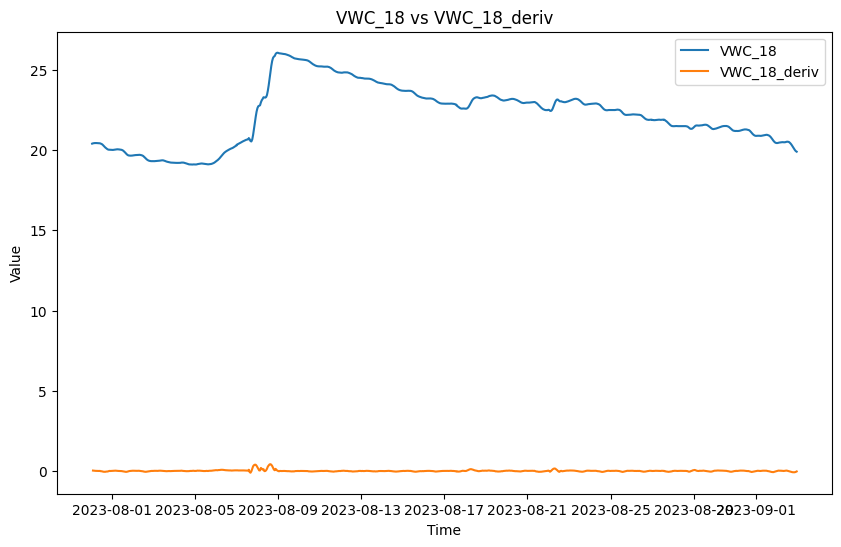

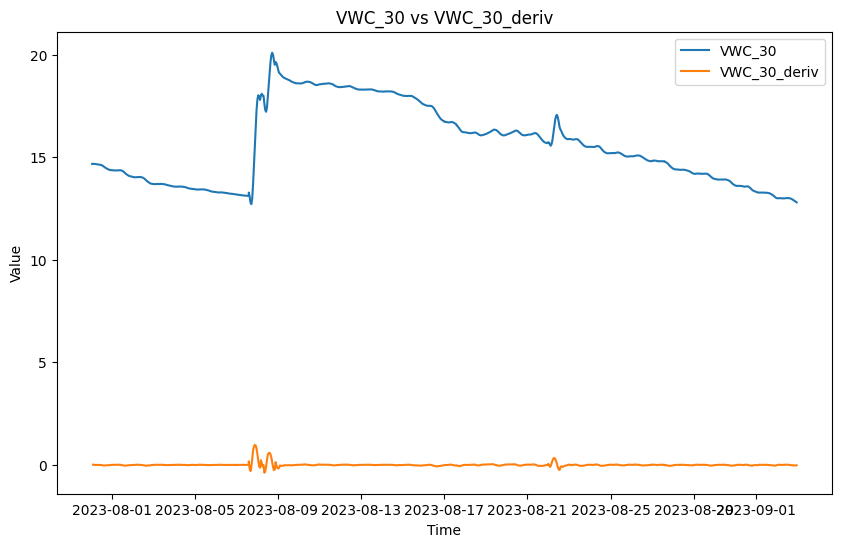

Shape of transformed DataFrame: (820, 31)


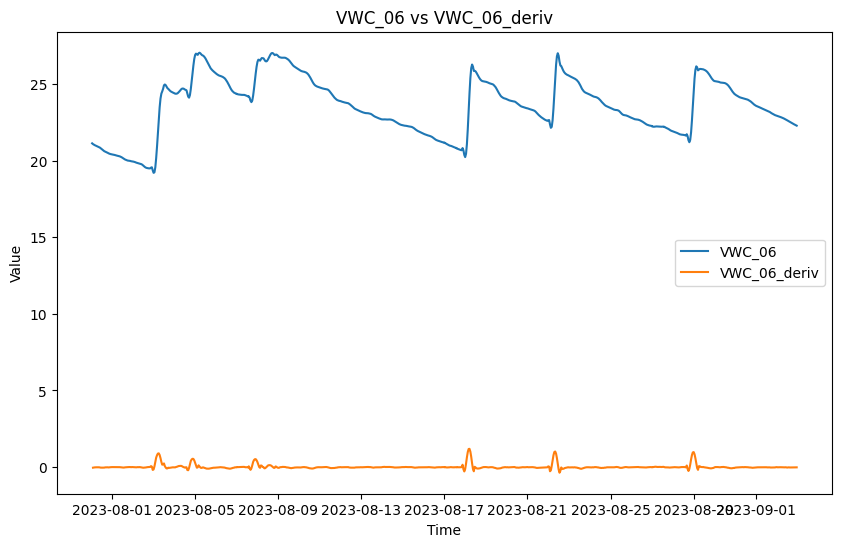

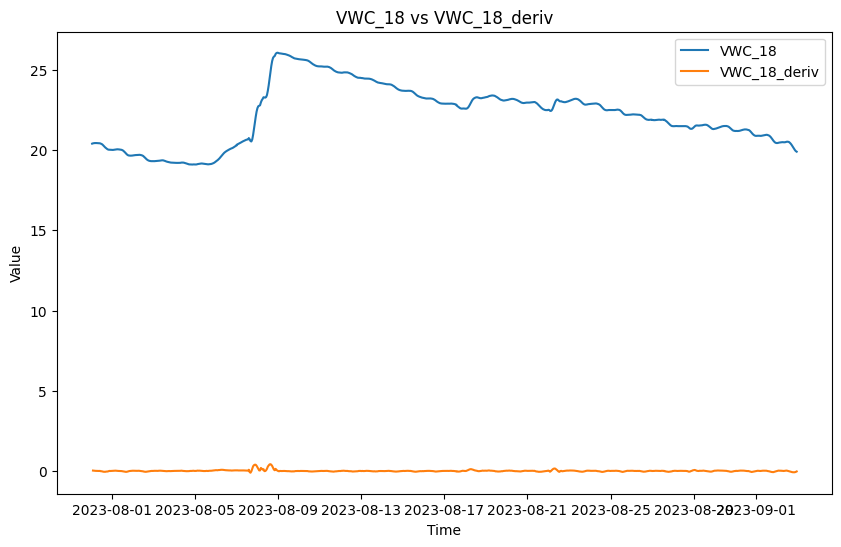

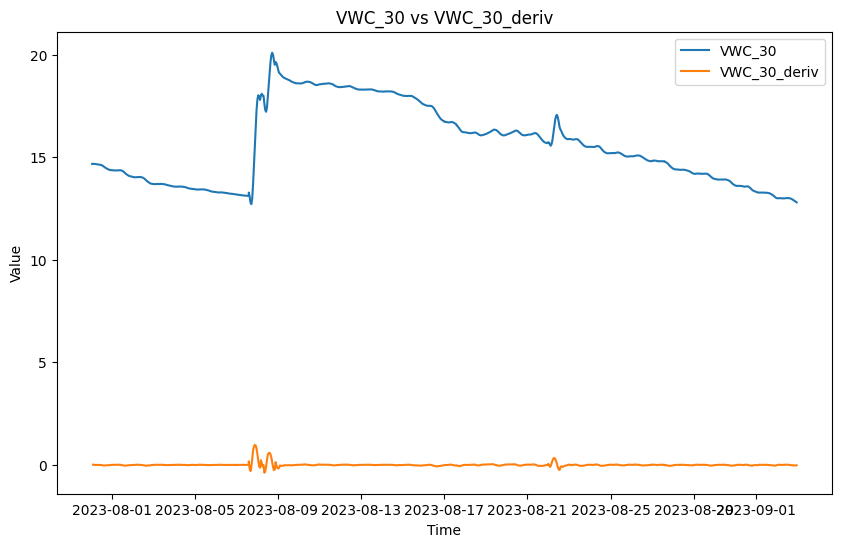

Shape of transformed DataFrame: (820, 31)


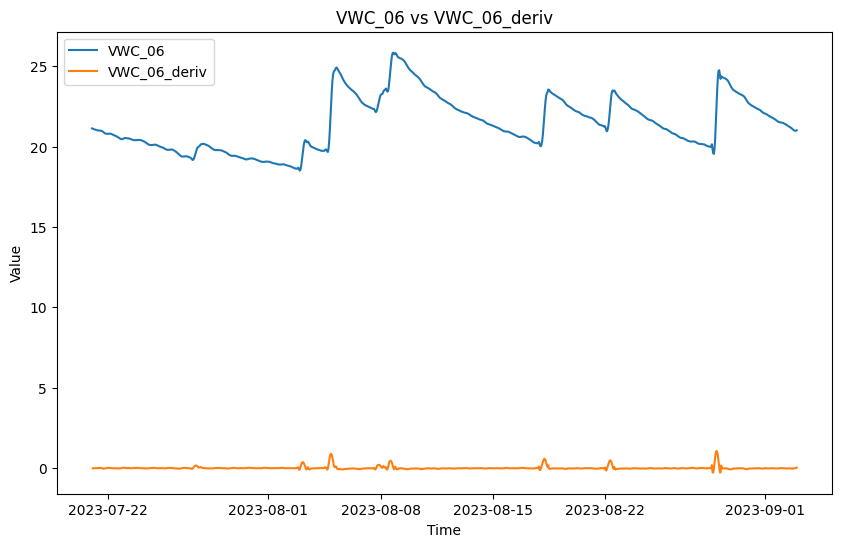

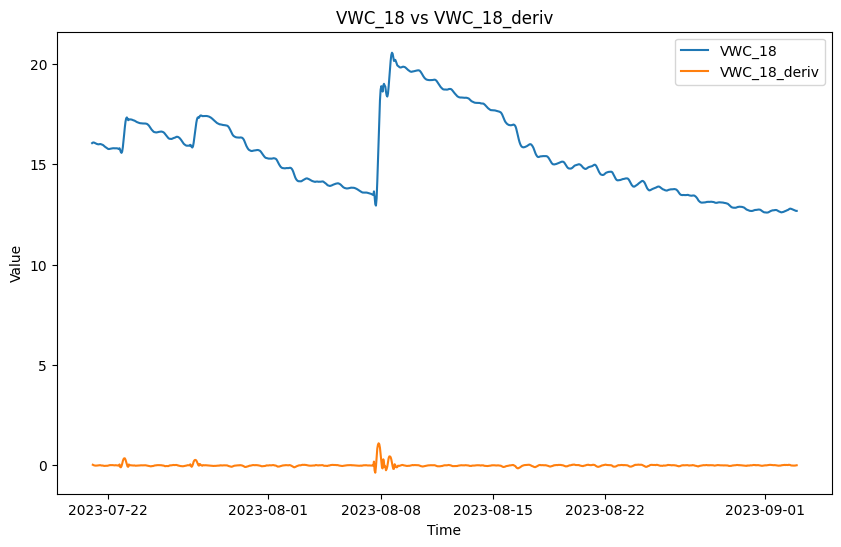

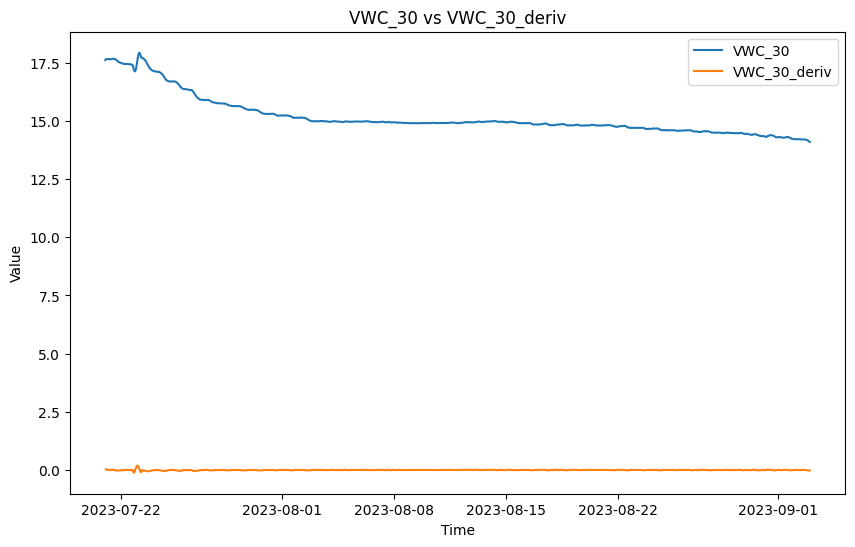

Shape of transformed DataFrame: (1055, 31)


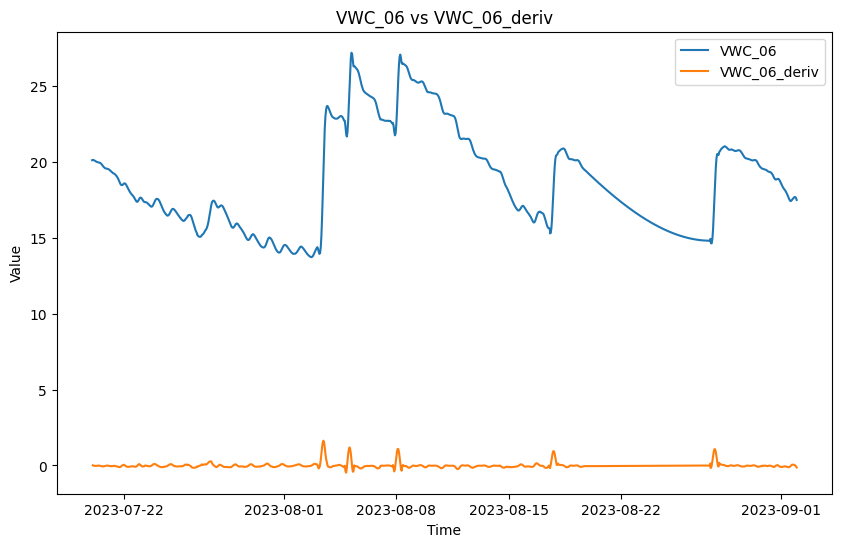

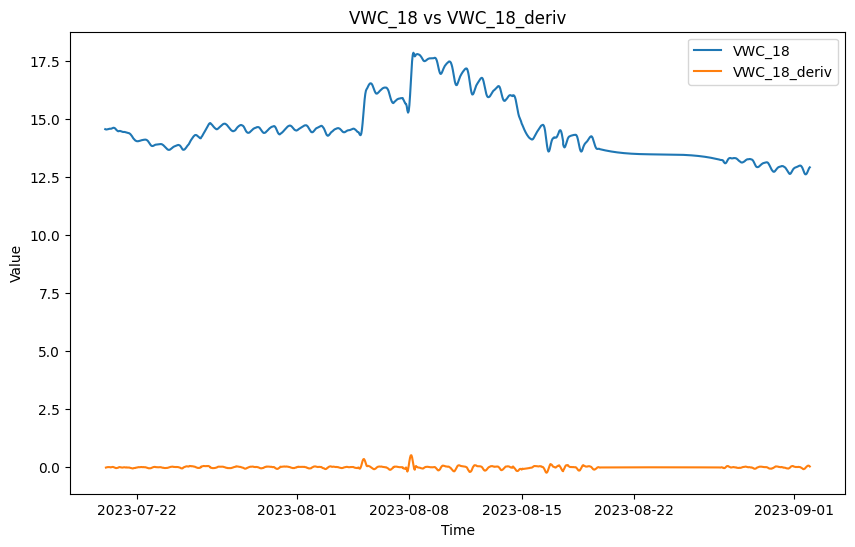

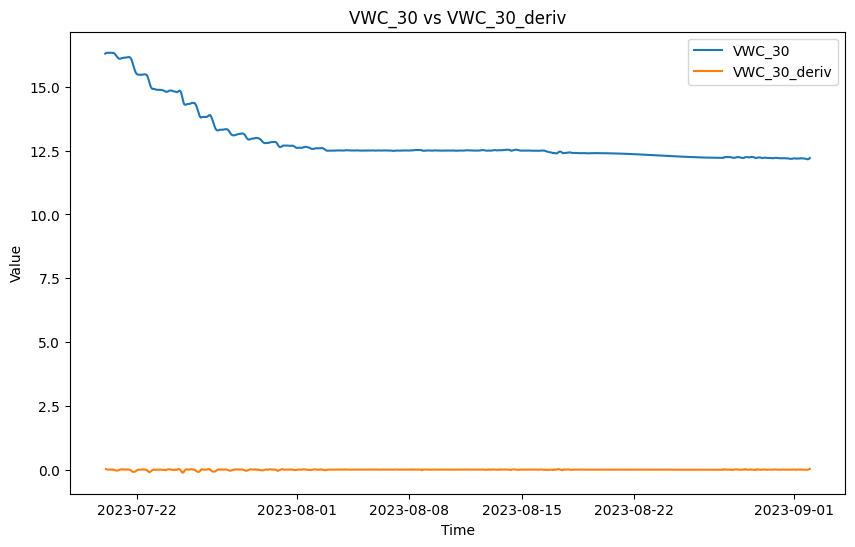

Shape of transformed DataFrame: (1062, 31)


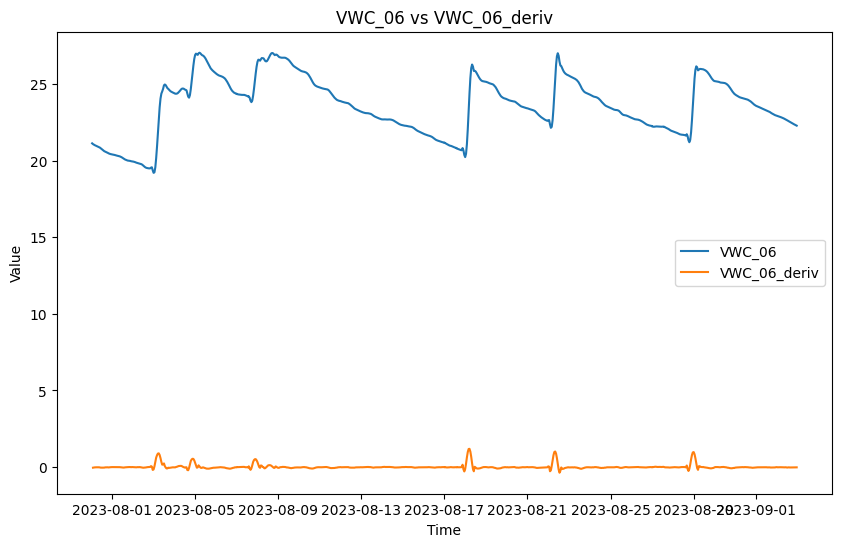

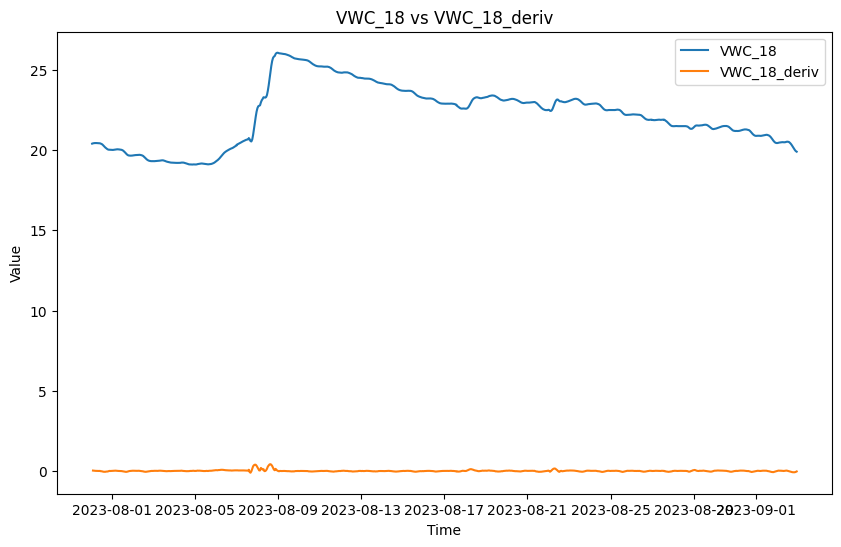

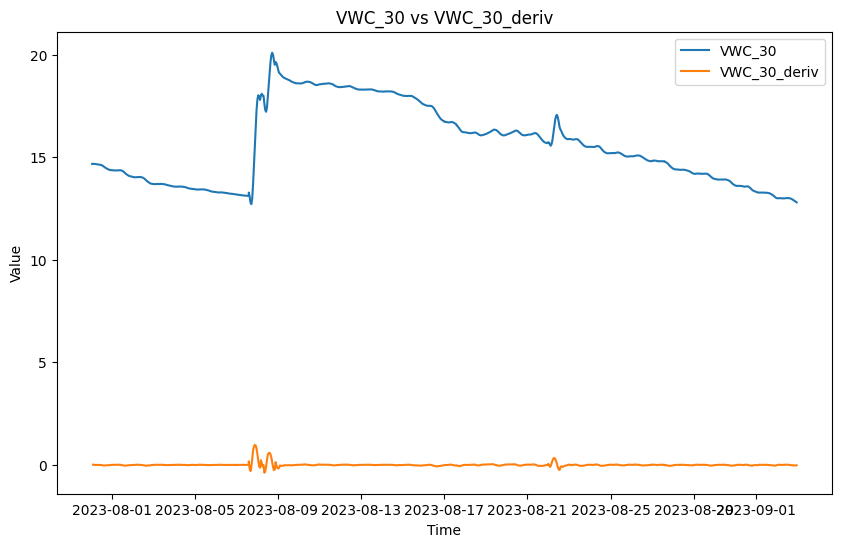

Shape of transformed DataFrame: (820, 31)


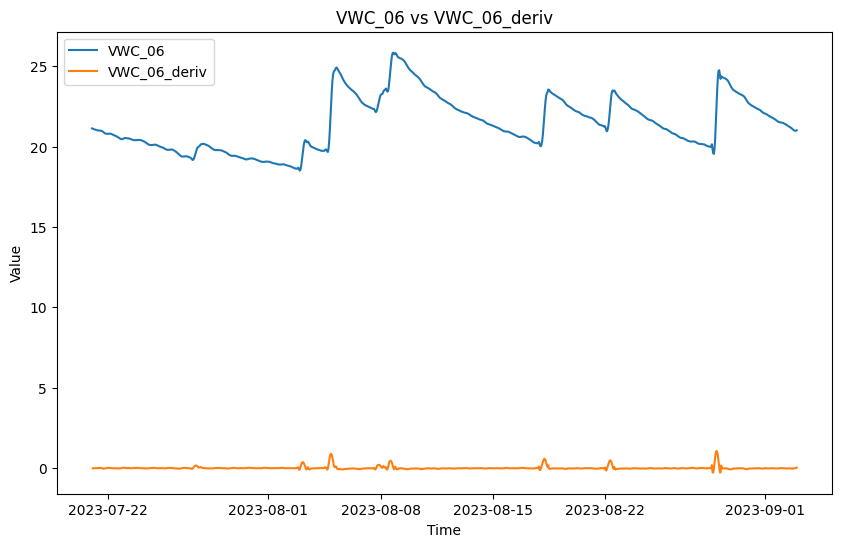

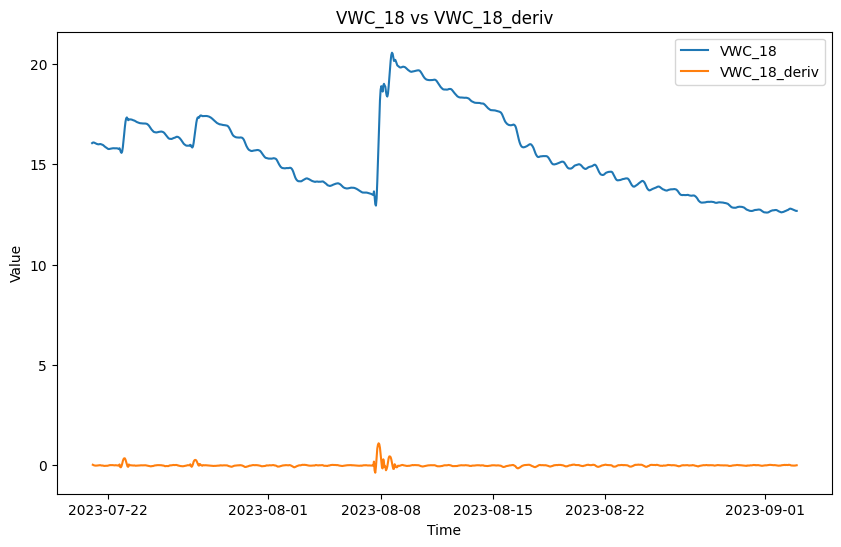

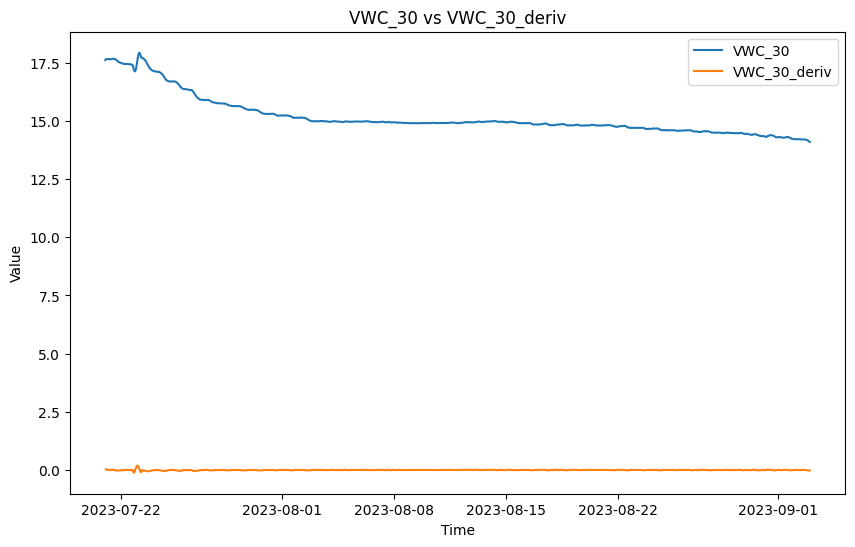

Shape of transformed DataFrame: (1055, 31)


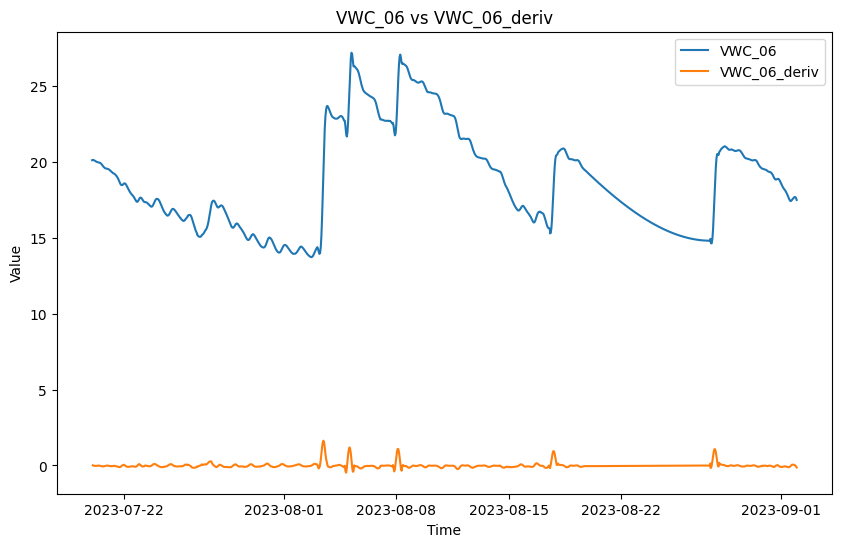

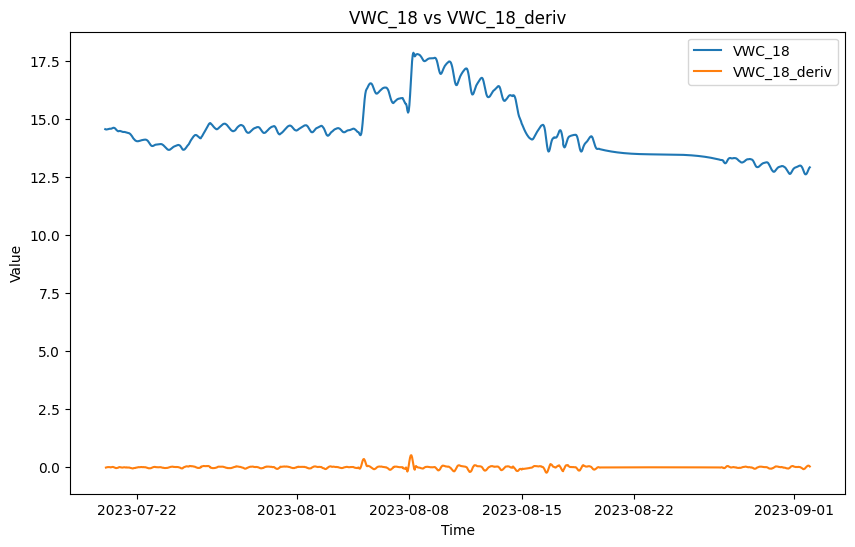

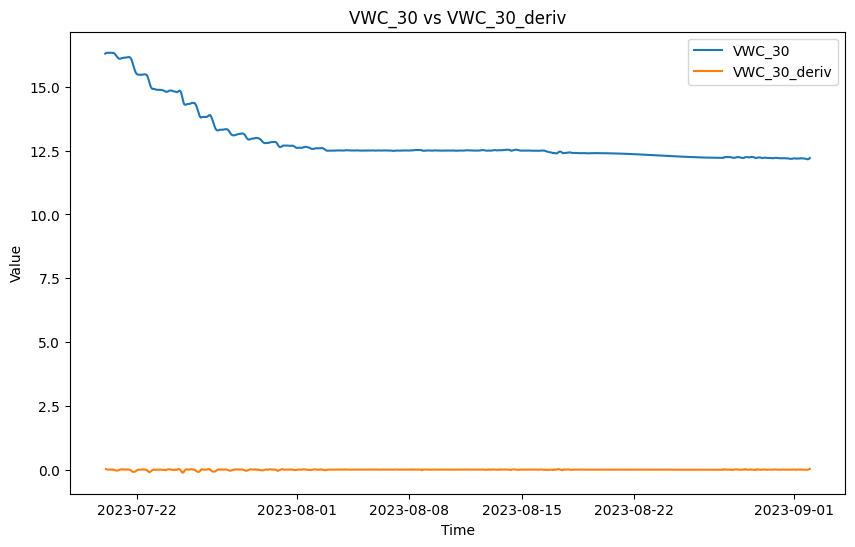

Shape of transformed DataFrame: (1062, 31)
Validation loss improved at epoch 1. Loss: 0.23072880506515503
INFO:tensorflow:Assets written to: ./LSTM_model_checkpoint_0\assets


INFO:tensorflow:Assets written to: ./LSTM_model_checkpoint_0\assets


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2 
import matplotlib.pyplot as plt



def subtract_mean(df, target_columns, keep_original_cols=True):
    mean_values = {}
    for col in target_columns:
        mean_value = df[col].mean()
        # When keep_original_cols is True, subtract the mean from a new column
        if keep_original_cols:
            new_col_name = f"{col}_mean_subtracted"
            df[new_col_name] = df[col] - mean_value
        else:
            df[col] -= mean_value
        mean_values[col] = mean_value
    return df, mean_values



def create_derivative_columns(df, target_columns, keep_original_cols=True):
    """Calculates difference-based derivatives of specified columns.

    Args:
        df: Pandas DataFrame containing the data.
        target_columns: List of columns for which derivatives are calculated.
        keep_original_cols: If True, creates new columns; otherwise overwrites.

    Returns:
        DataFrame with derivative columns, plus initial values if needed.
    """

    initial_values = {}  # Store initial values for reconstruction

    for col in target_columns:
        deriv_col_name = f"{col}_deriv"

        if keep_original_cols:
            df[deriv_col_name] = df[col].diff()  # Calculate differences
            
             #Plot the original and derived columns
            plt.figure(figsize=(10, 6))
            plt.plot(df[col], label=col)
            plt.plot(df[deriv_col_name], label=deriv_col_name)
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.title(f'{col} vs {deriv_col_name}')
            plt.legend()
            plt.show()
            
        else:
            initial_values[col] = df[col].iloc[0]  # Store initial value
            df[col] = df[col].diff()  
            

    return df, initial_values  # Return initial values as well

def scale_dataframe(df, scalers):
    """
    Optimally scale all columns in a DataFrame using MinMaxScaler, adjusting for an expanded range with a buffer. 
    This involves creating a dummy range for scaler fitting, then scaling the original data with the adjusted scaler.

    Args:
        df (pd.DataFrame): DataFrame with columns to be scaled.
        scalers (dict): Dictionary storing the scalers for each column.

    Returns:
        pd.DataFrame: Scaled DataFrame using the optimally adjusted scalers.
        dict: Dictionary of the adjusted scalers.
    """
    scaled_df = pd.DataFrame()  # Initialize an empty DataFrame for scaled values
    for column in df.columns:
        # Check if a scaler already exists; if not, proceed to create and fit a new one
        if column not in scalers:
            # Calculate the original range and apply a 30% buffer
            col_min, col_max = df[column].min(), df[column].max()
            range_buffer = (col_max - col_min) * 0.3  # 30% buffer
            buffered_min = col_min - range_buffer
            buffered_max = col_max + range_buffer

            # Create a new scaler and fit it on the buffered range
            scaler = MinMaxScaler(feature_range=(0, 1))
            scaler.fit([[buffered_min], [buffered_max]])
            scalers[column] = scaler

        # Scale the original data with the adjusted scaler
        scaled_values = scalers[column].transform(df[[column]].values.reshape(-1, 1)).flatten()  # Flatten the array here
        scaled_df[column] = scaled_values


    return scaled_df, scalers


def transform_and_scale_data(df, target_columns, scalers, keep_original_cols=True):
    """
    Transforms and scales the data in the DataFrame for neural network input, returning the
    transformed DataFrame, updated scalers, and transformation metadata.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_columns (list): List of target column names.
        scalers (dict): Dictionary containing MinMaxScalers for each column, can be empty.
        keep_original_cols (bool): If True, keeps original columns unchanged except for scaling;
                                   if False, applies transformations directly on the target columns.

    Returns:
        pd.DataFrame: The transformed and scaled DataFrame.
        dict: Updated dictionary containing MinMaxScalers for each column.
        dict: A dictionary containing transformation metadata for the target columns.
    """

    # Copy DataFrame to avoid modifying the original
    df_transformed = df.copy()

    
    # Subtract mean from target columns
    df_transformed, mean_values = subtract_mean(df_transformed, target_columns, keep_original_cols)
    
    # Apply transformations directly using helper functions
    df_transformed, initial_values = create_derivative_columns(df_transformed, target_columns, keep_original_cols)
    
    # Deleting or adjusting rows as necessary (e.g., due to NaN values from differentiation)
    df_transformed = df_transformed.iloc[1:]
    
    # Scale all columns in df_transformed
    df_transformed, scalers = scale_dataframe(df_transformed, scalers)
    
    print(f"Shape of transformed DataFrame: {df_transformed.shape}")
    
    # Metadata for reverse transformation
    transformation_metadata = {
        'means': mean_values,
        'scalers': scalers,
        'keep_original_cols': keep_original_cols,
        'initial_values': initial_values
    }

    return df_transformed, transformation_metadata


def reverse_transform_and_scale_data(df, transformation_metadata, target_columns):
    """
    Reverses the transformations and scaling applied to the DataFrame.

    Args:
        df (pd.DataFrame): The transformed and scaled DataFrame.
        transformation_metadata (dict): A dictionary containing transformation metadata.
        target_columns (list): List of target columns to be reverse transformed and scaled.

    Returns:
        pd.DataFrame: The DataFrame with reversed transformations and scaling.
    """

    # Extract metadata
    scalers = transformation_metadata['scalers']
    mean_values = transformation_metadata['means']
    initial_values = transformation_metadata['initial_values']
    keep_original_cols = transformation_metadata['keep_original_cols']

    # Print dimensions of df
    print(f"Shape of input DataFrame: {df.shape}")


    # Apply undifferencing with cumsum() and initial values if original columns were not kept
    if not keep_original_cols:
        for column in target_columns:
            # Reverse subtract mean from target columns if they were mean-adjusted
            if column in mean_values:
                df[column] = df[column] + mean_values[column]
                print(f"Reversed mean for {column}: ", df[column].head())

            # Apply cumsum() to reverse the differencing using initial values
            if column in initial_values:
                df[column] = df[column].cumsum() + initial_values[column]
                print(f"Undifferenced {column}: ", df[column].head())
                
    # Reverse scale the target columns
    for column in target_columns:
        if column in scalers:
            # Reshape data for inverse_transform
            scaled_data = df[[column]].values
            # Apply inverse_transform
            df[column] = scalers[column].inverse_transform(scaled_data)

    return df




# Sequence Creation Function
def create_sequences(input_data, target_data, input_window, forecast_horizon, stride=1):
    X, y = [], []
    for start in range(len(input_data) - input_window - forecast_horizon + stride):
        end = start + input_window
        X.append(input_data[start:end])
        y.append(target_data[end:end + forecast_horizon])
    return np.array(X), np.array(y)

# Model Definition Function for 4 Target Variables
def build_model(input_shape, num_targets):
    model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True, kernel_regularizer=l2(0.01)), 
        Dropout(0.2),
        LSTM(64, return_sequences=True, kernel_regularizer=l1(0.01)),  
        Dropout(0.2),
        LSTM(36, return_sequences=False),
        Dense(96 * num_targets), 
        Reshape((96, num_targets)) 
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Expanding Window Split Function
def expanding_window_split(X, y, test_size, n_windows):
    total_samples = len(X)
    window_size = int(test_size * total_samples / n_windows)
    X_trains, X_vals, y_trains, y_vals = [], [], [], []
    
    for i in range(n_windows):
        val_start = int(i * window_size)
        val_end = total_samples - val_start
        train_end = val_start
        
        X_train = X[:train_end]
        X_val = X[val_start:val_end]
        y_train = y[:train_end]
        y_val = y[val_start:val_end]
        
        X_trains.append(X_train)
        X_vals.append(X_val)
        y_trains.append(y_train)
        y_vals.append(y_val)
    
    return X_trains, X_vals, y_trains, y_vals

# Retain tf.function for performance optimization
@tf.function
def train_step(model, optimizer, loss_function, x_batch, y_batch):
    with tf.GradientTape() as tape:
        predictions = model(x_batch, training=True)
        loss = loss_function(y_batch, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

@tf.function
def val_step(model, loss_function, x_batch, y_batch):
    predictions = model(x_batch, training=False)
    loss = loss_function(y_batch, predictions)
    return loss

def run_workflow(training_data_transformed, target_variables, input_window, forecast_horizon, stride, epochs, batch_size, n_windows=3):
    dataframe_identifiers = []

    # Model and optimizer definition moved here, outside the training and validation loop
    model = build_model((input_window, training_data_transformed()[0][0].shape[1]), len(target_variables))
    optimizer = tf.keras.optimizers.Adam()
    loss_function = tf.keras.losses.MeanSquaredError()

    for i, transformed_data in enumerate(training_data_transformed()):
        df = transformed_data[0]
        X, y = create_sequences(df.values, df[target_variables].values, input_window, forecast_horizon, stride)
        X_trains, X_vals, y_trains, y_vals = expanding_window_split(X, y, test_size=0.2, n_windows=n_windows)

        best_val_loss = np.inf
        checkpoint_path = f"./LSTM_model_checkpoint_{i}"
        patience = 10
        wait = 0

        for epoch in range(epochs):
            # Training
            for X_train, y_train in zip(X_trains, y_trains):
                dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
                for x_batch, y_batch in dataset:
                    train_step(model, optimizer, loss_function, x_batch, y_batch)

            # Validation
            epoch_val_losses = []
            for X_val, y_val in zip(X_vals, y_vals):
                dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
                val_losses = []
                for x_batch, y_batch in dataset:
                    val_loss = val_step(model, loss_function, x_batch, y_batch)
                    val_losses.append(val_loss)
                avg_val_loss = tf.reduce_mean(val_losses)
                epoch_val_losses.append(avg_val_loss)

            # Early Stopping and Model Checkpoint Logic
            total_val_loss = tf.reduce_mean(epoch_val_losses)
            if total_val_loss < best_val_loss:
                best_val_loss = total_val_loss
                print(f"Validation loss improved at epoch {epoch+1}. Loss: {total_val_loss}")
                model.save(checkpoint_path)
                wait = 0
            else:
                wait += 1
                print(f"Validation loss did not improve at epoch {epoch+1}. Loss: {total_val_loss}")
                if wait >= patience:
                    print(f"Stopping early at epoch {epoch+1} due to no improvement.")
                    break

    return checkpoint_path


# Example Usage
plot_numbers = [2014, 2015, 2007]


# Initialize a scaler
scalers = {}

# *** Important: Update the target_columns and continuous_columns based on your chosen target columns ***
# *** Any columns included in target_columns should be removed from continuous_columns ***
target_columns = ['VWC_06', 'VWC_18', 'VWC_30']
time_columns = ['day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos']
continuous_columns = [
    'Ta_2m_Avg', 'RH_2m_Avg', 'Solar_2m_Avg', 'WndAveSpd_3m', 'Rain_1m_Tot', 'Dp_2m_Avg',
    'TaMax_2m', 'TaMin_2m', 'RHMax_2m', 'RHMin_2m', 'HeatIndex_2m_Avg',
    'daily_et', 'CWSI', 'SWSI', 'irrigation', 'precip_irrig','canopy_temp'
]
derivative_columns = ['precip_irrig']

input_window = 168
forecast_horizon = 96
stride = 1
epochs = 200
batch_size = 32  
n_windows = 5  

# Set to True to keep original columns unchanged
keep_original_cols=True


# Lambda function to handle training data and plot numbers
training_data_dfs = lambda: [process_data_for_plot(plot) for plot in plot_numbers]


# run once to get the transformation metadata
_, transformation_metadata = transform_and_scale_data(training_data_dfs()[0], target_columns, scalers, keep_original_cols)

# re-run with the transformation metadata for all training dataframes
training_data_transformed = lambda: [transform_and_scale_data(df, target_columns, transformation_metadata['scalers'], keep_original_cols) for df in training_data_dfs()]

# run the workflow for training the model
checkpoint_path = run_workflow(training_data_transformed, target_columns, 
                                      input_window, forecast_horizon, stride, epochs, batch_size)

checkpoint_path =run_workflow(training_data_transformed=training_data_transformed,
             target_variables=target_columns,
             input_window=input_window,
             forecast_horizon=forecast_horizon,
             stride=stride,
             epochs=epochs,
             batch_size=batch_size,
             n_windows=n_windows)


    
